# Baseball Case Study

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


In [3]:
# df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Problem identifying

In [4]:
#Checking the data type of each attribute
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

According to the issue statement, the target variable, W, is an int64, a continuous value, hence regression is used to develop our model.

# Analysing exploratory data


In [7]:
#Checking shape of dataset
df.shape

(30, 17)

My dataset consists of 30 rows and 17 columns.


In [8]:
#Checking the data types of all columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Except for ERA, all columns are of the int data type. ERA is a float type data.


In [9]:
#Verifying the dataset's information with 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Therefore, I can see that there is a (1)float64 value, a (16)int value, and no null values.


In [10]:
#Checking each column's unique values
df.nunique()  


W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

I can see that each column has a certain number of unique values.

In [11]:
#Checking null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

The provided dataset contains no missing values.


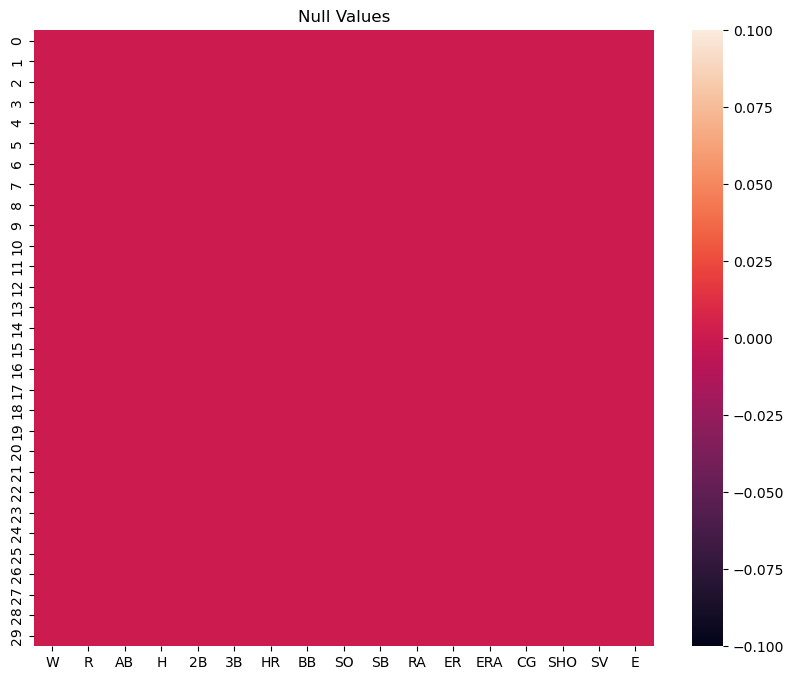

In [12]:
#Checking for null values in heat map
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

I can see from the graph that the provided dataset has no null values.


In [14]:
#Checking the target column's value count
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

I can see that the target column is free of any gaps or missing values.


In [18]:
#Dataset Description
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


I can see that every column has a count value of 30, that there are no negative values, and that only a small number of columns have very low values or very high values in the data set.


# Visualisation of data


# Analysis of One Variable:


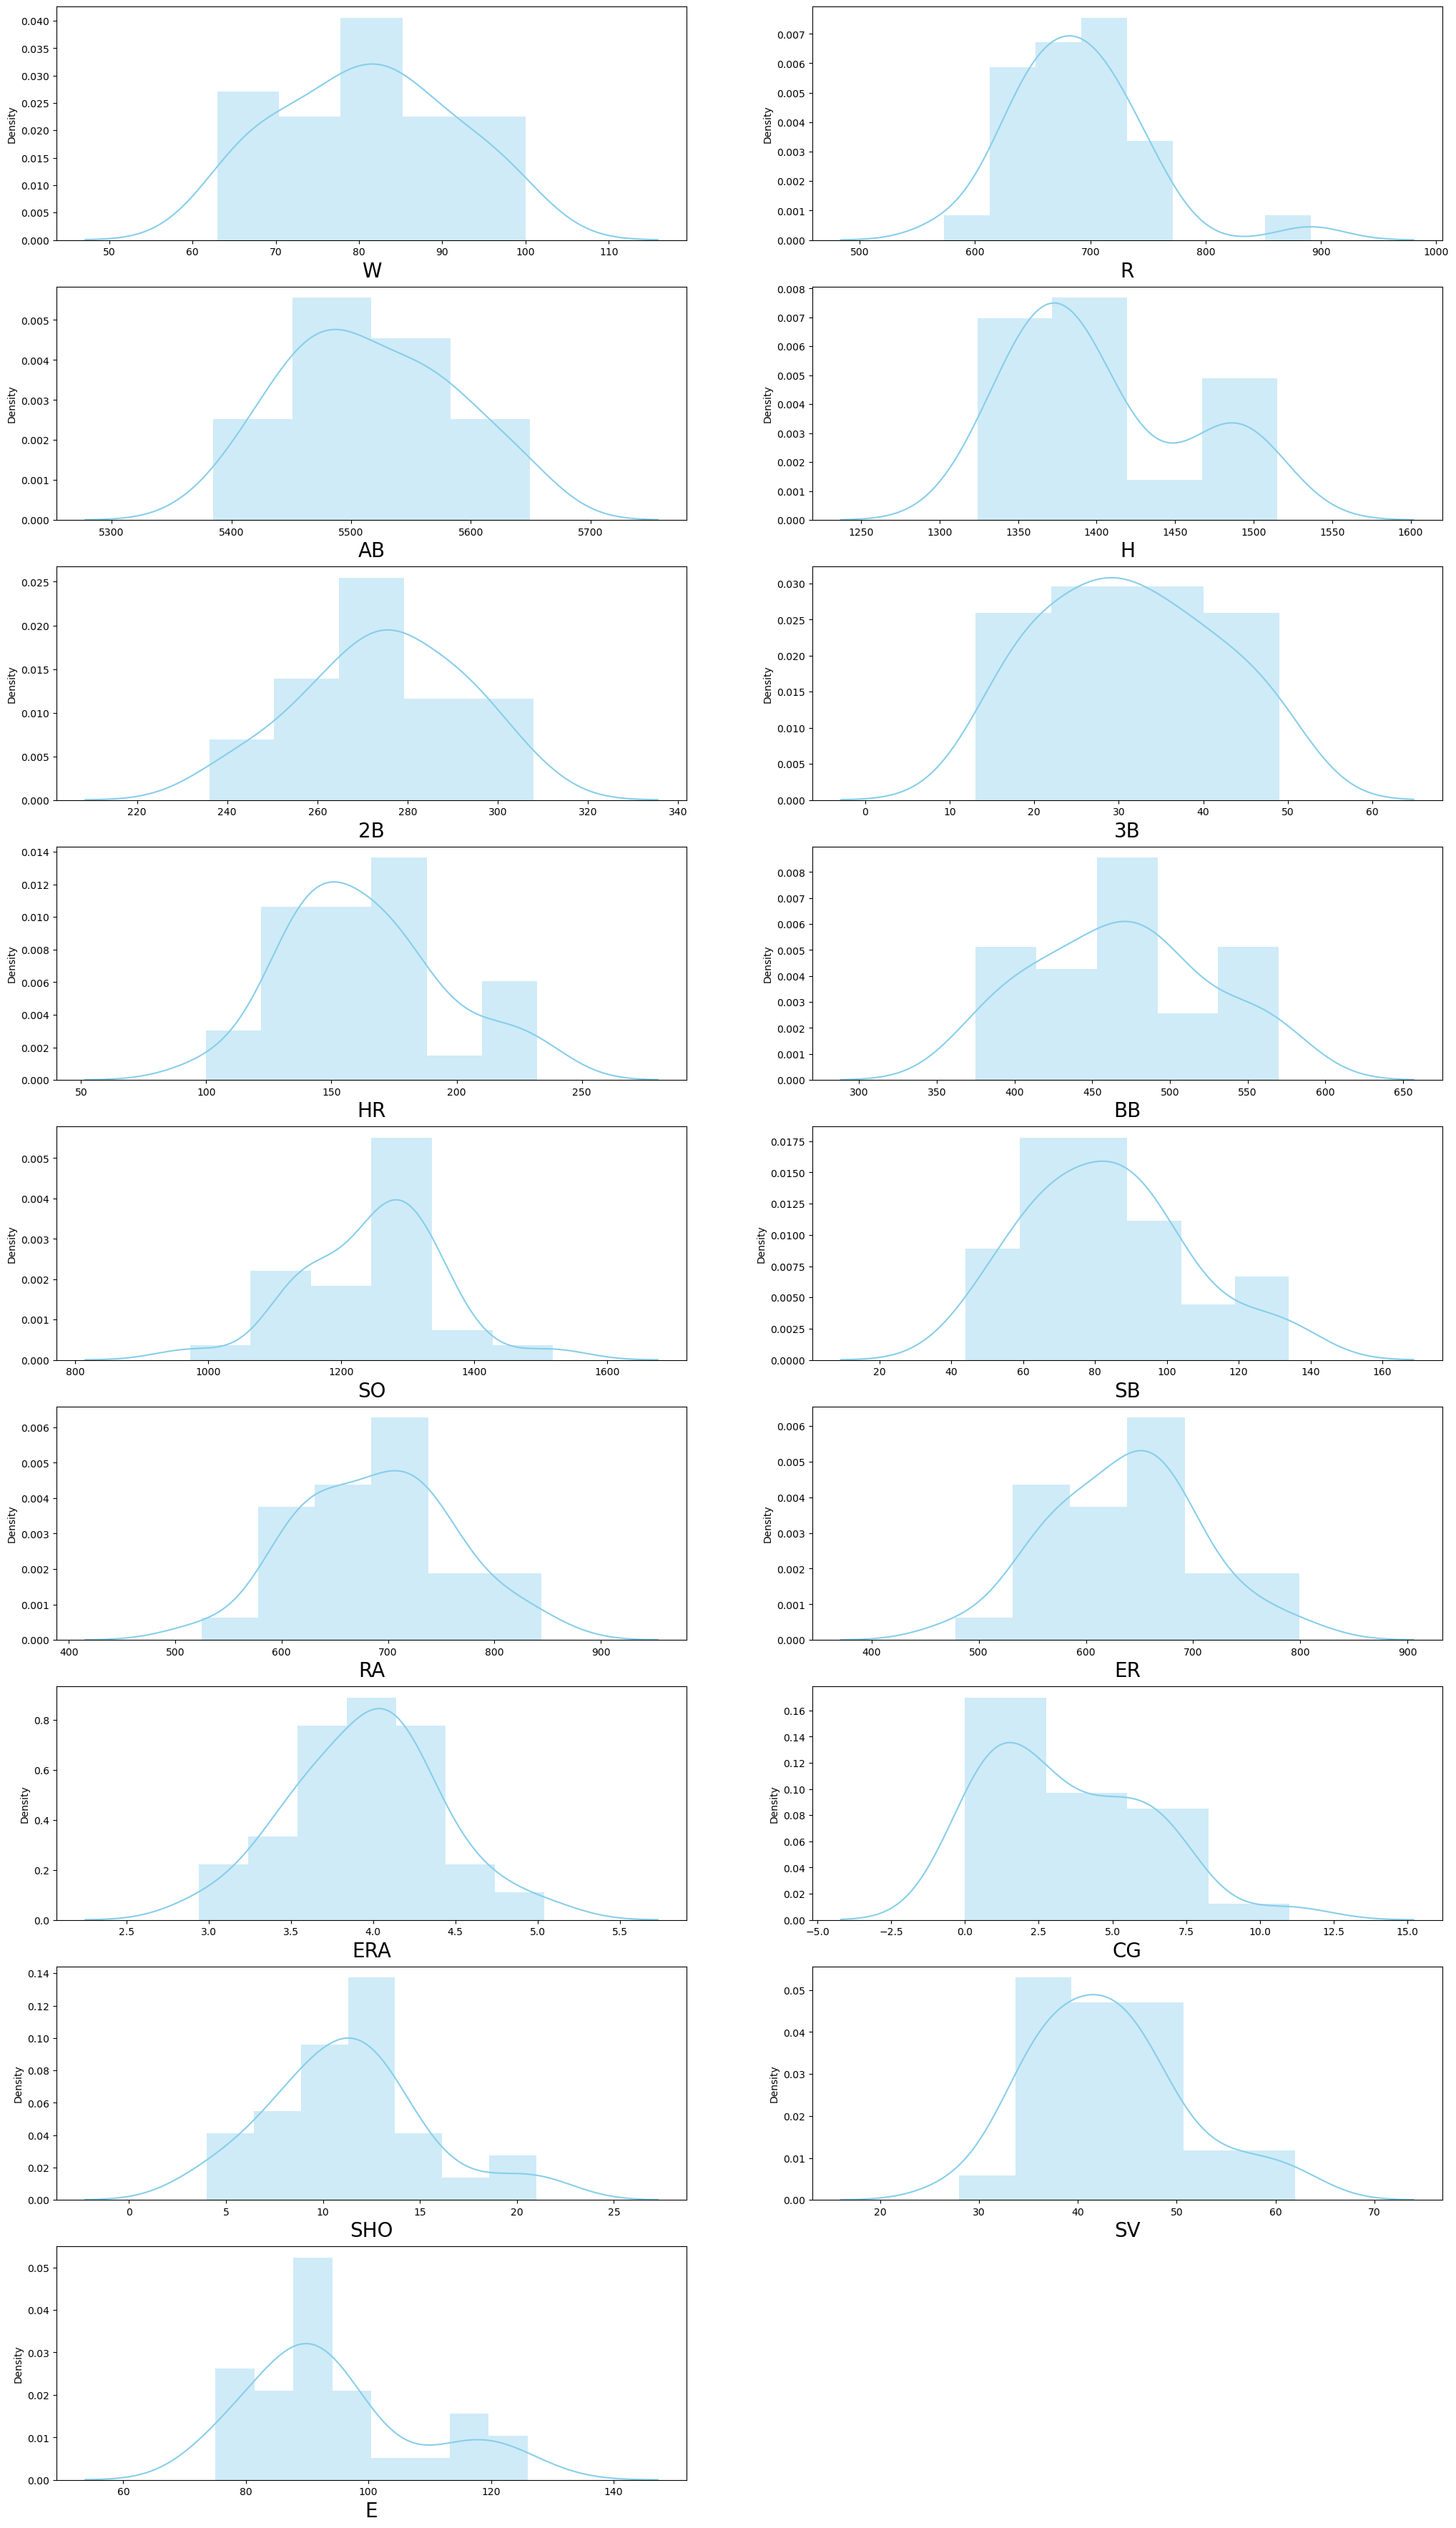

In [20]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Nearly all of the columns are evenly spaced.all save R, SO, CG, and E.


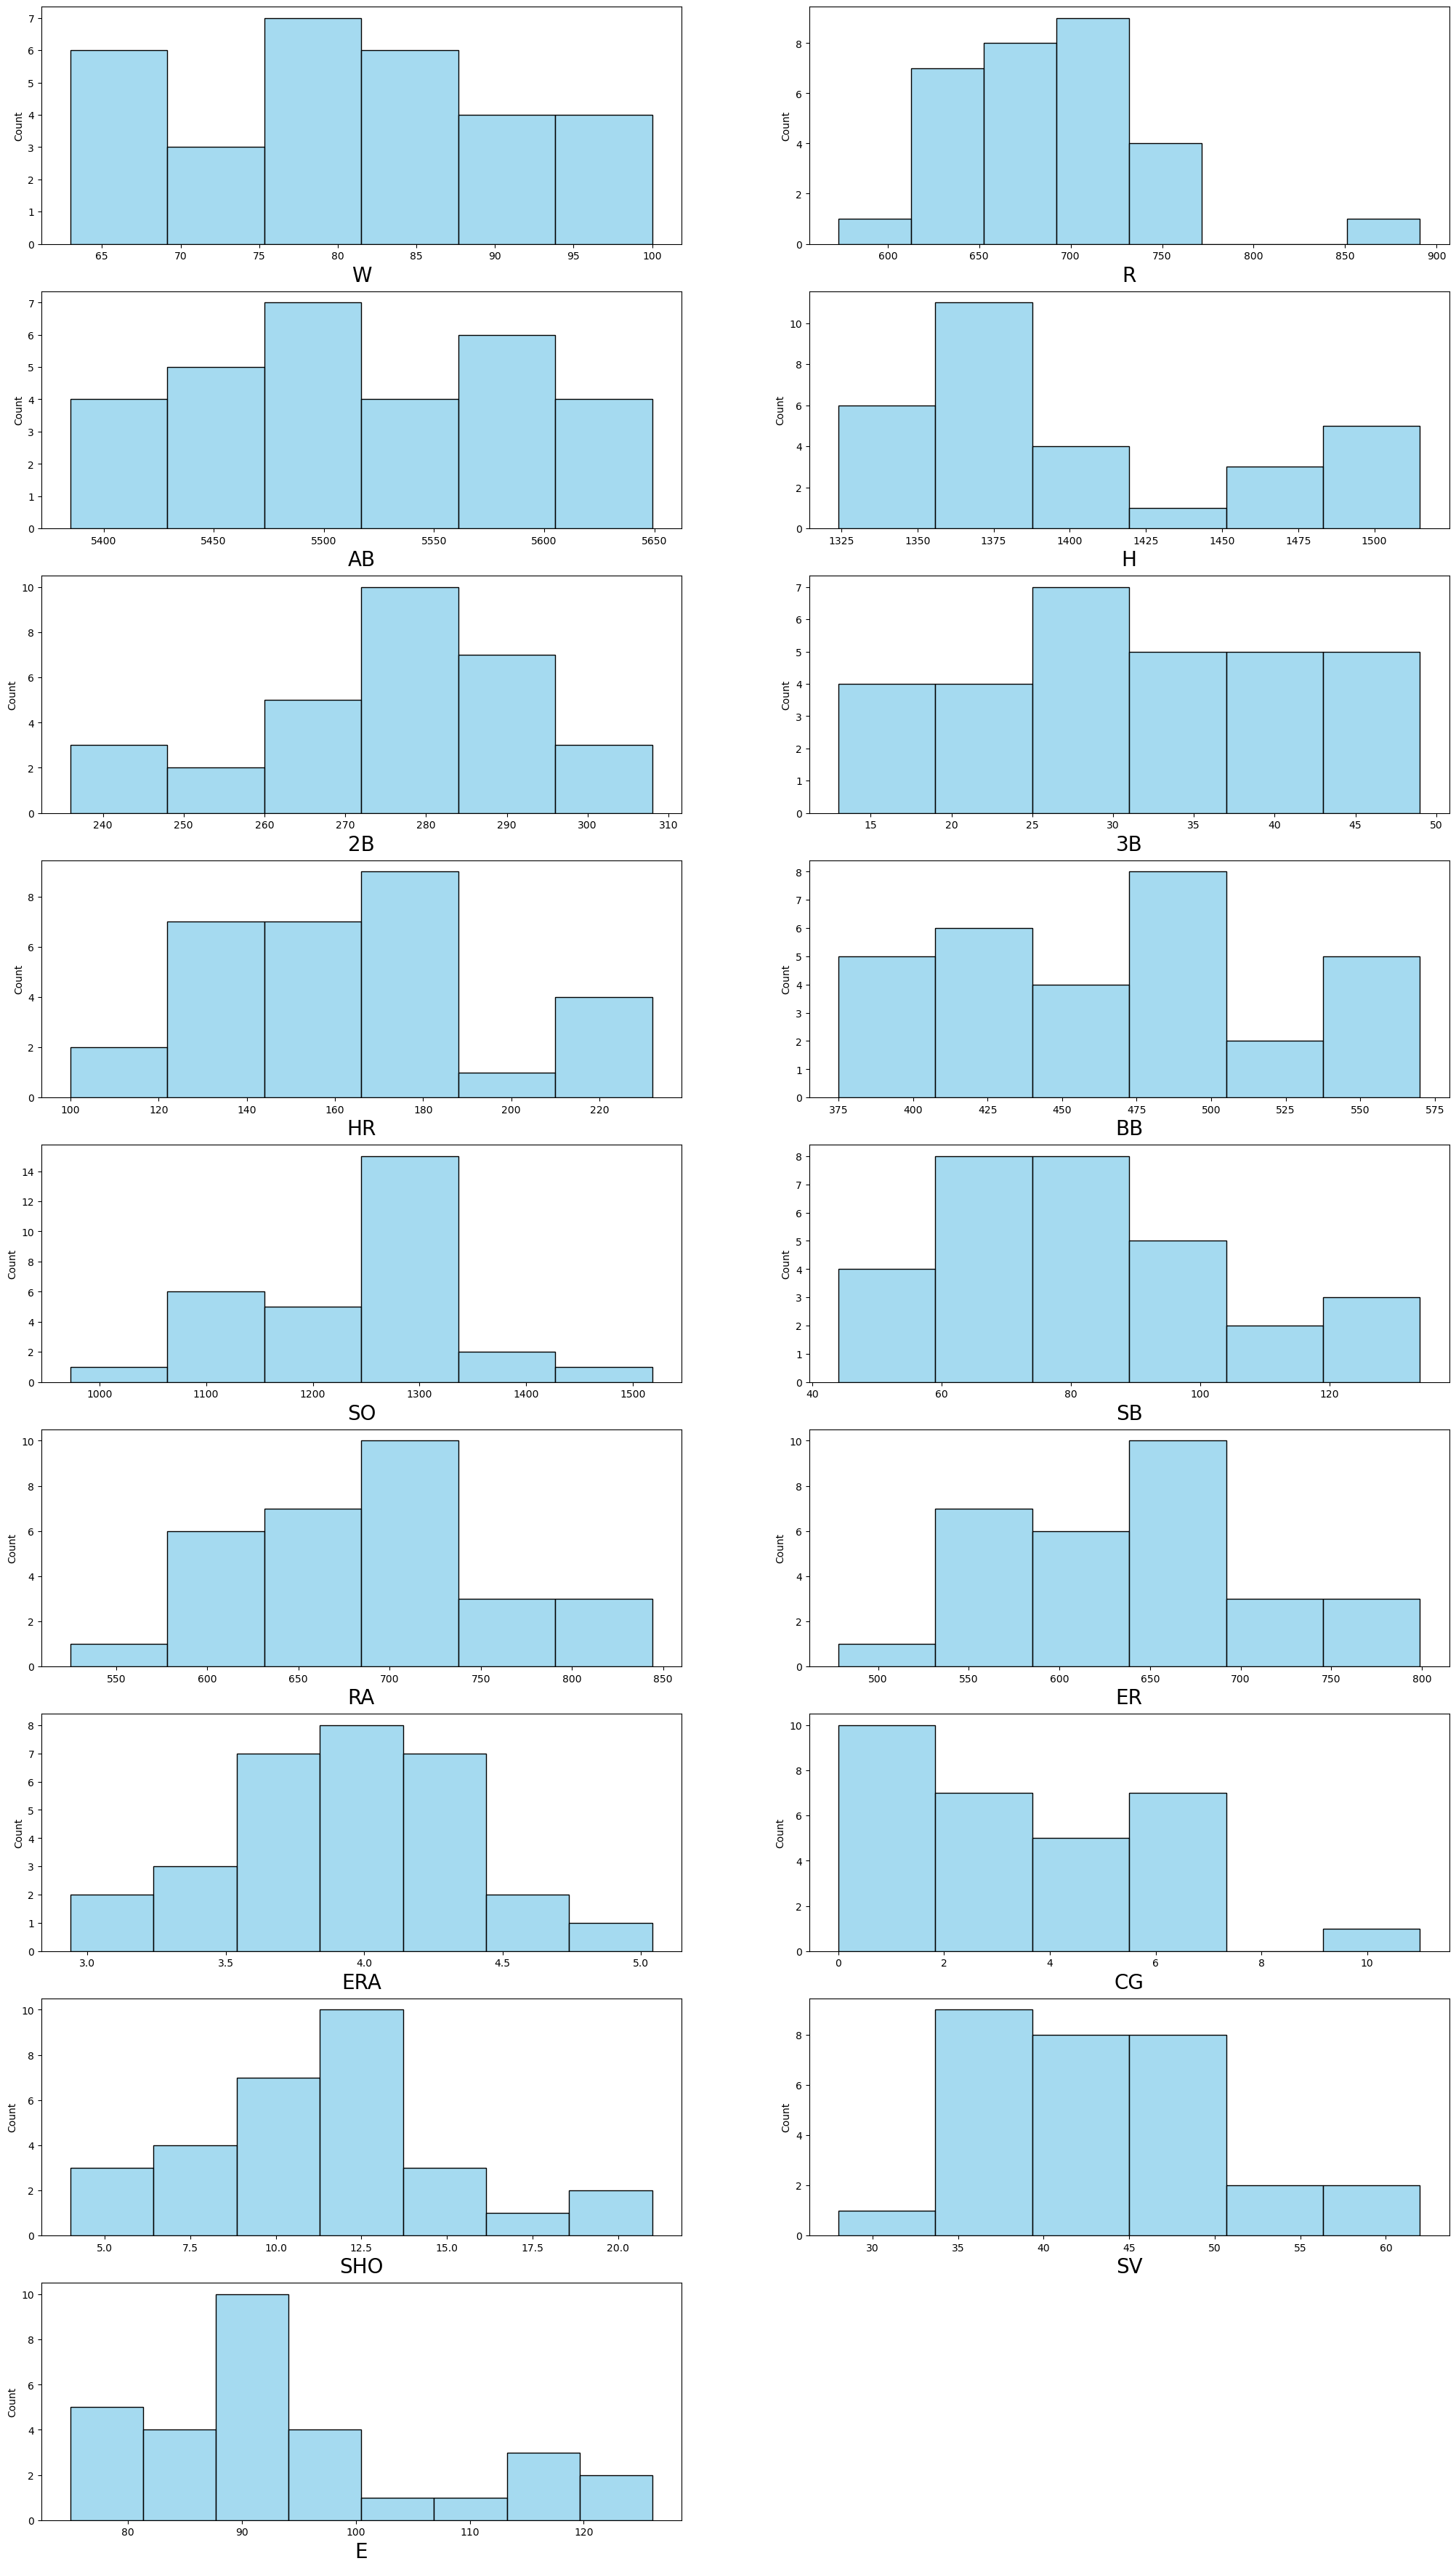

In [23]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

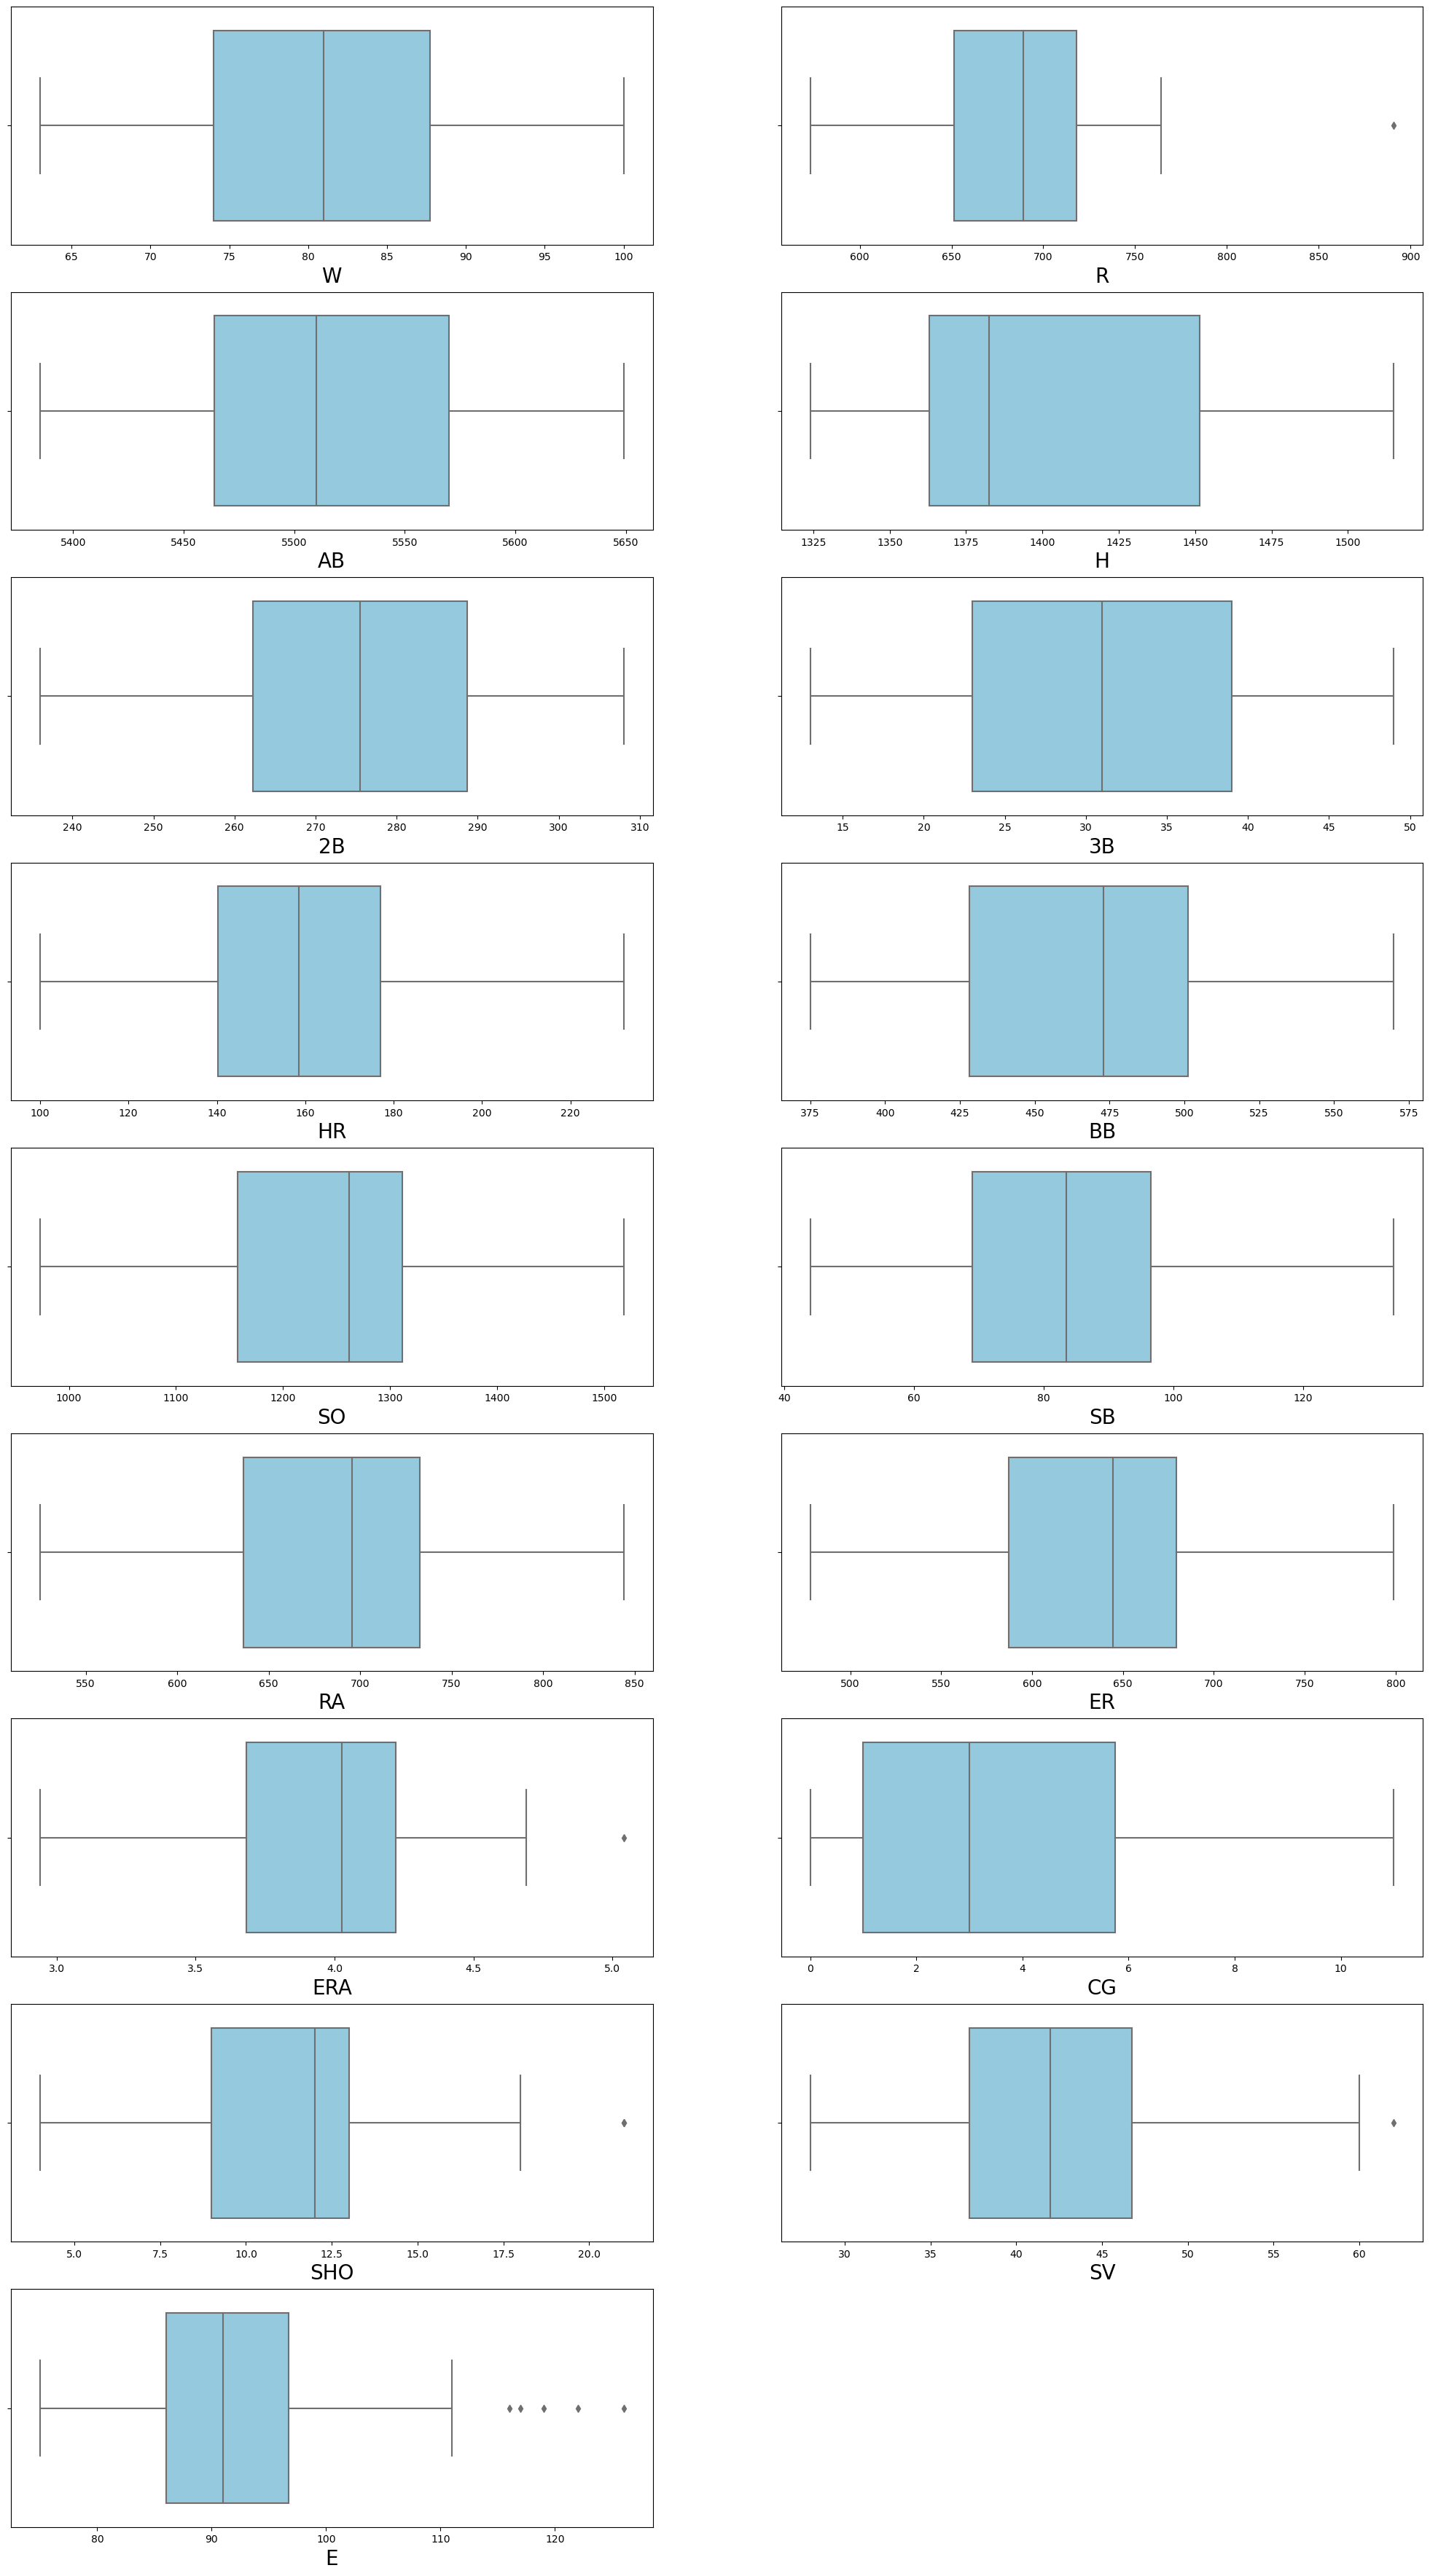

In [24]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

As seen in the boxplot, the input variables R, ERA, SHO, SV, and E contain outliers. Therefore, we must exclude outliers from the input variables.


# Bivariate Analysis:

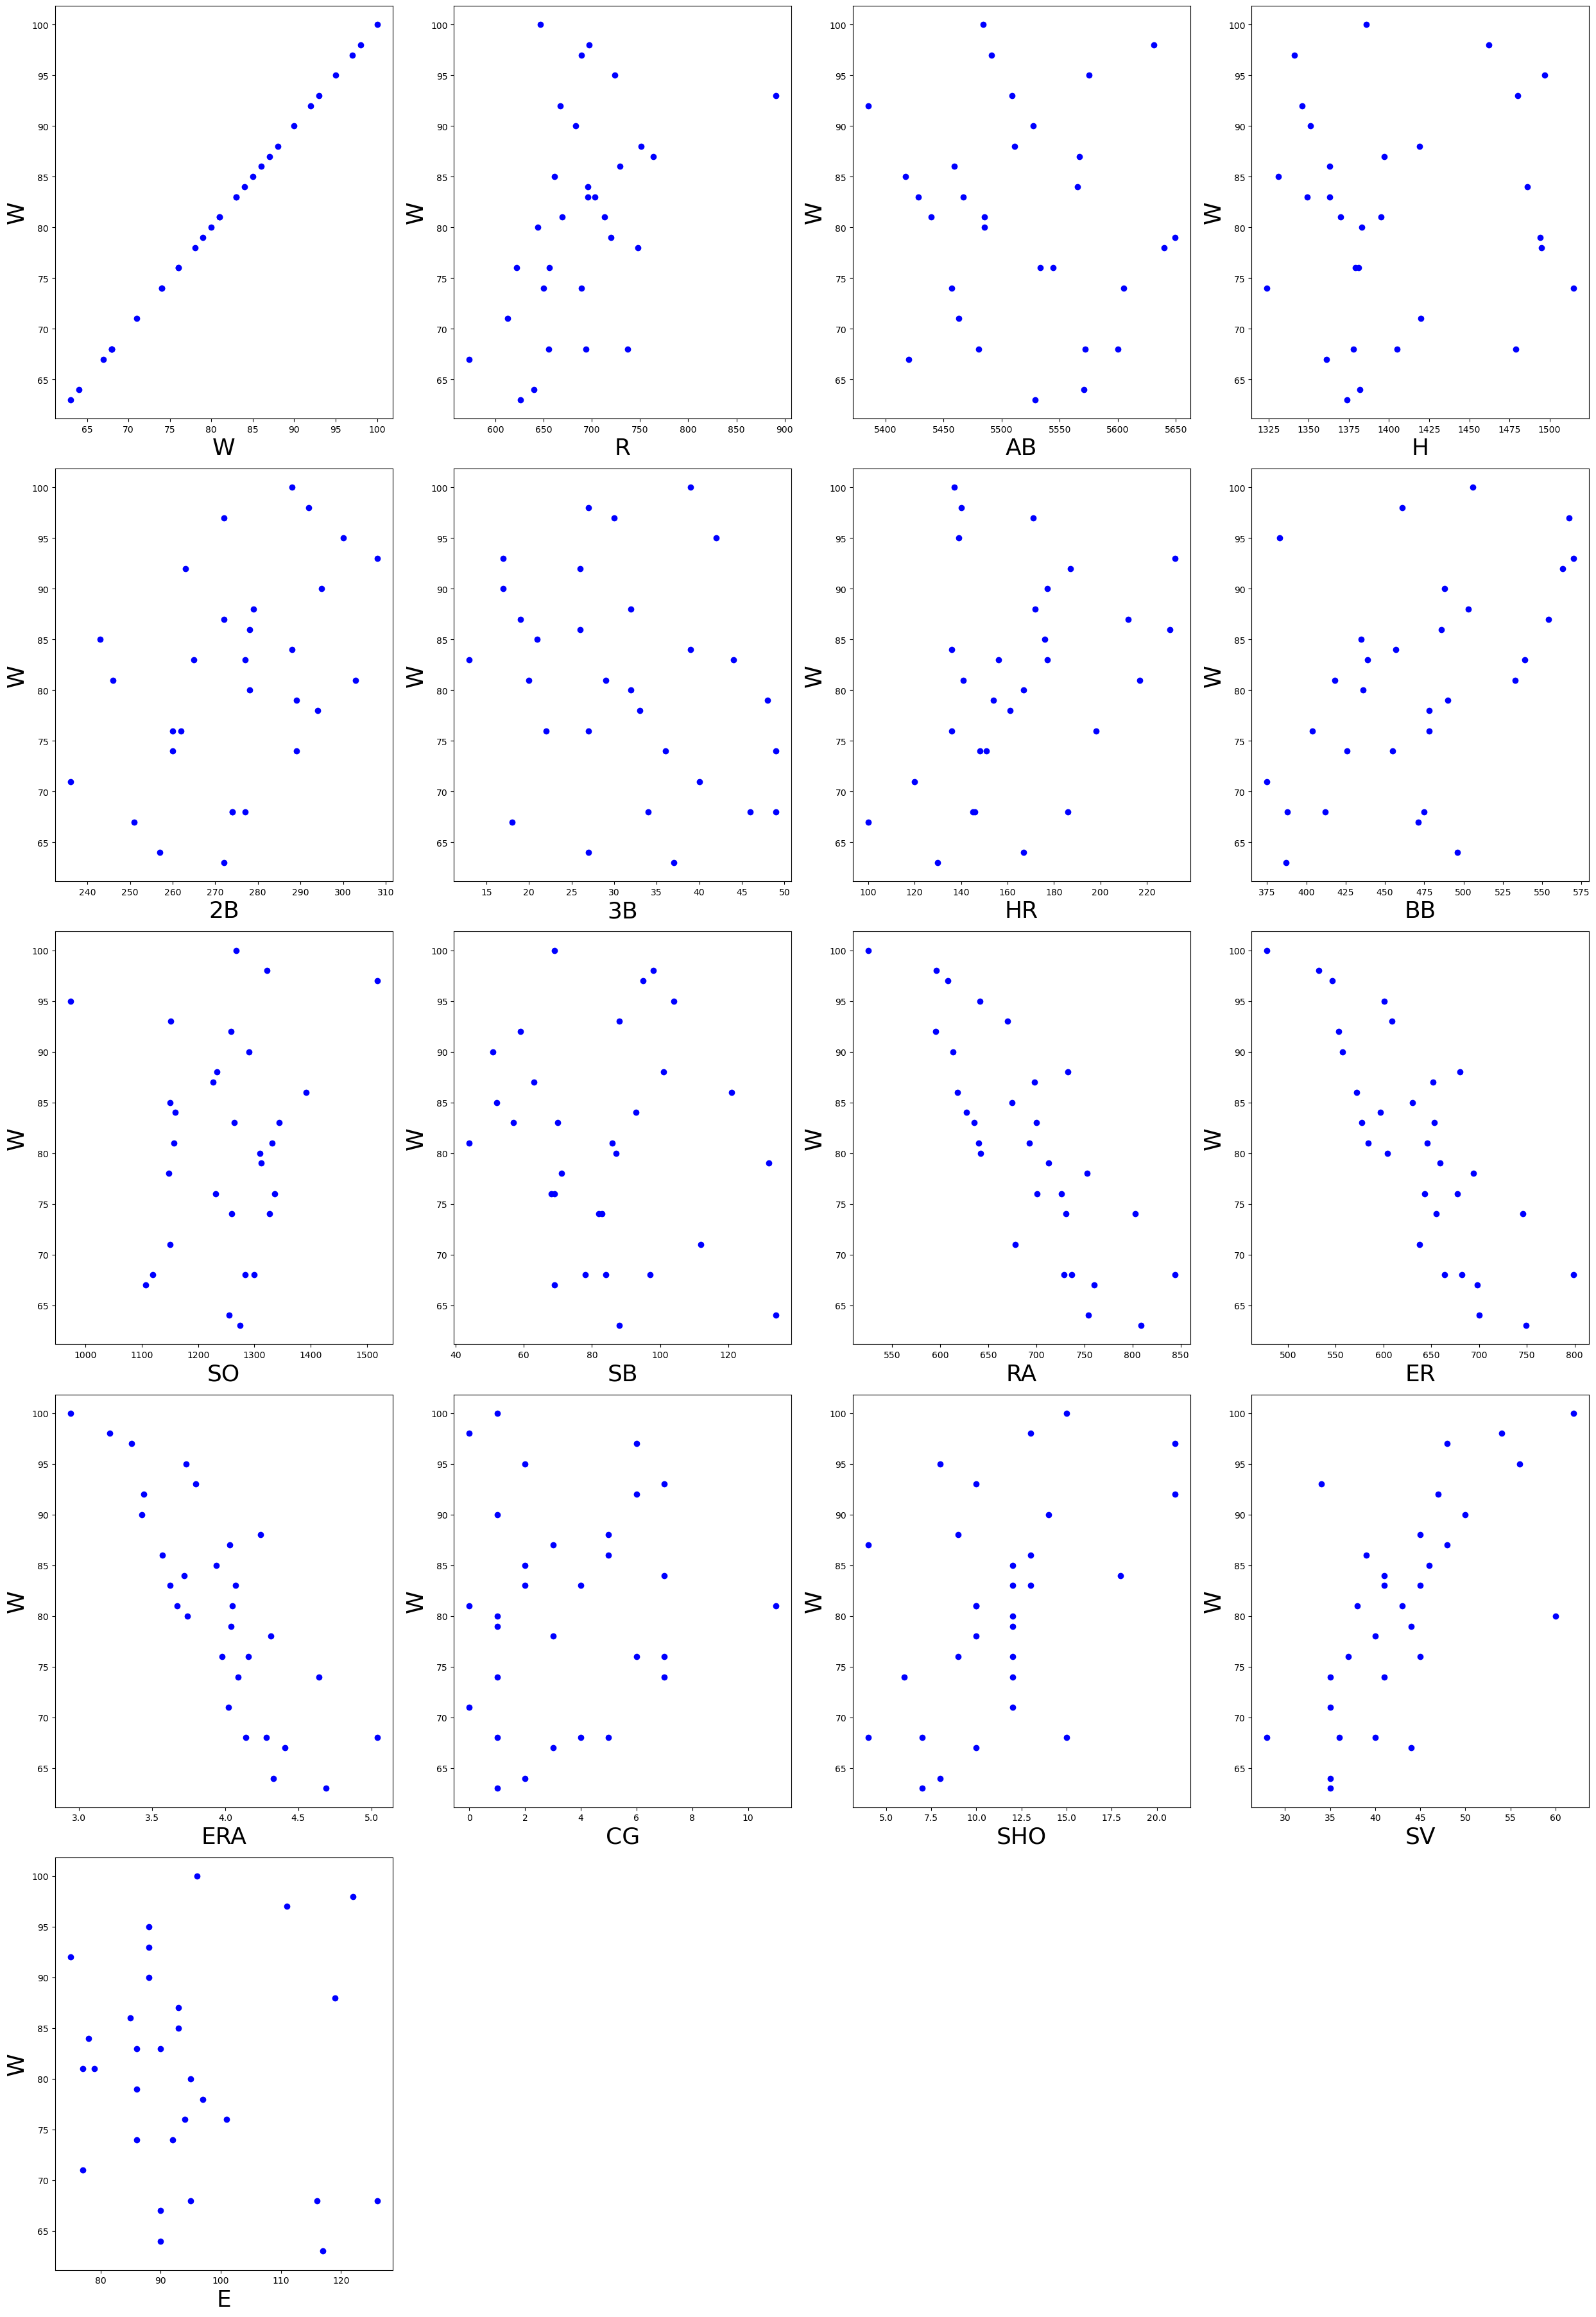

In [25]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()
    

As we can see from the plot, SV, ERA, SHO, and R have a nearly linear relationship to the target variable, while other variables have a nonlinear relationship.


<Figure size 2500x2000 with 0 Axes>

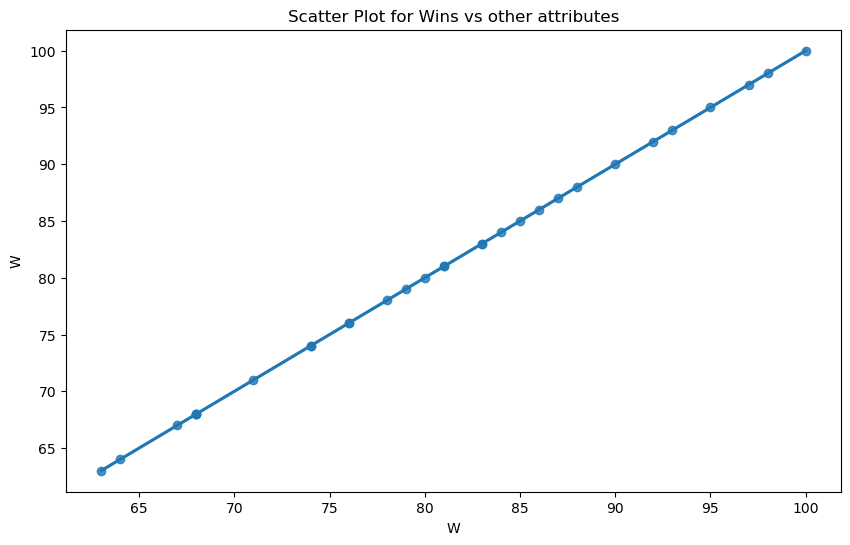

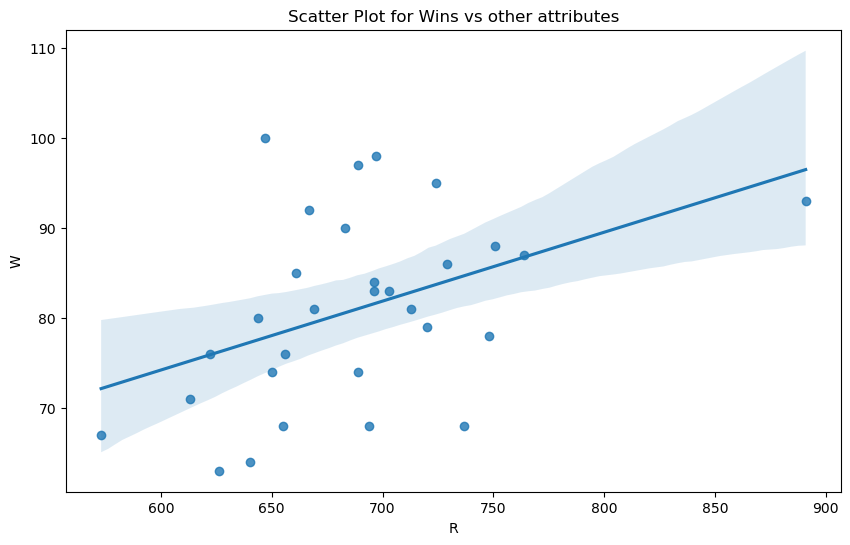

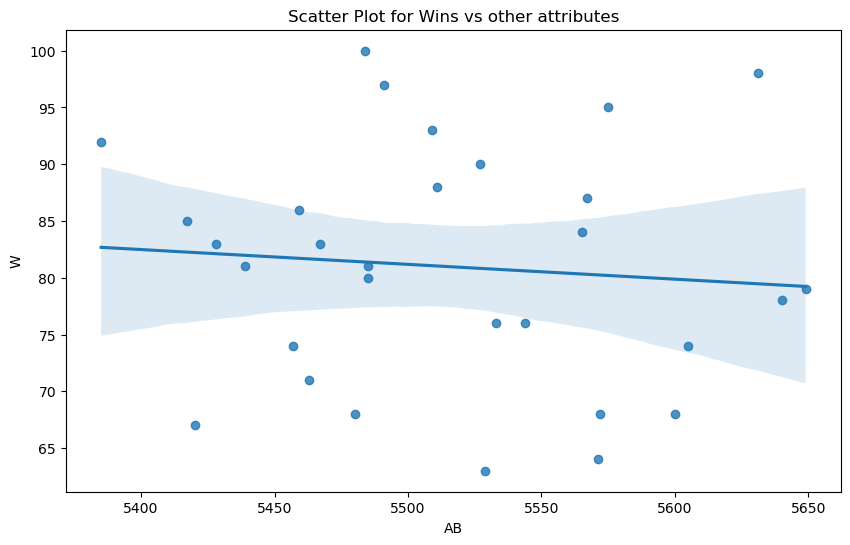

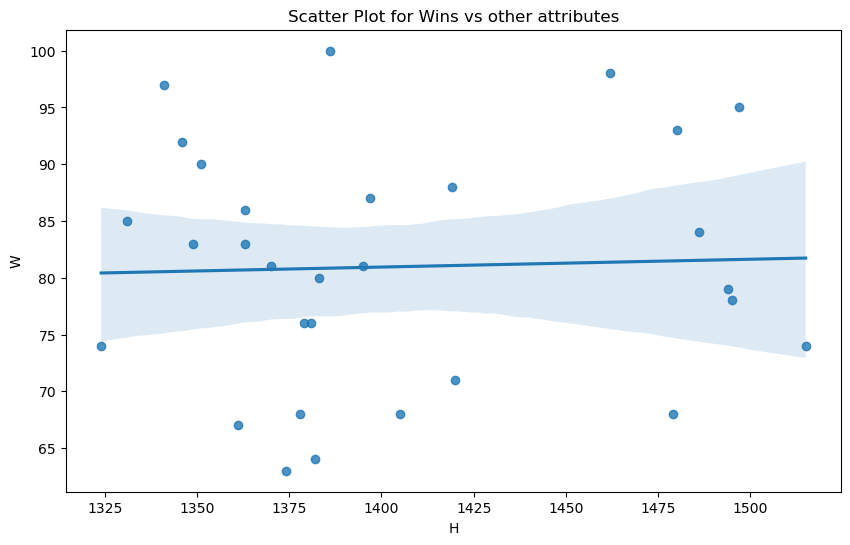

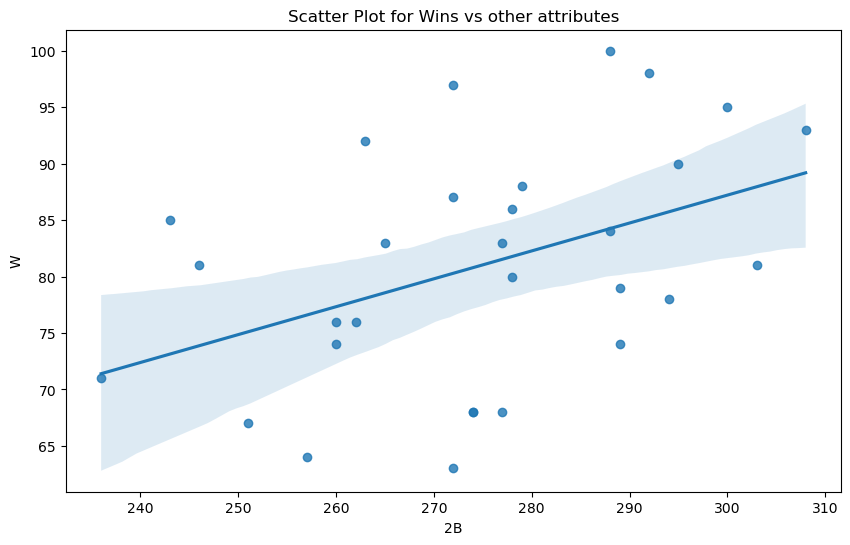

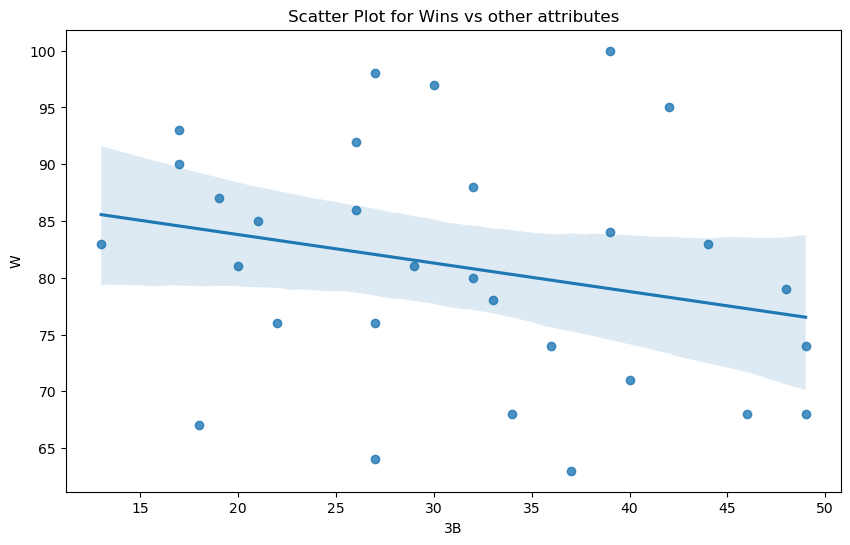

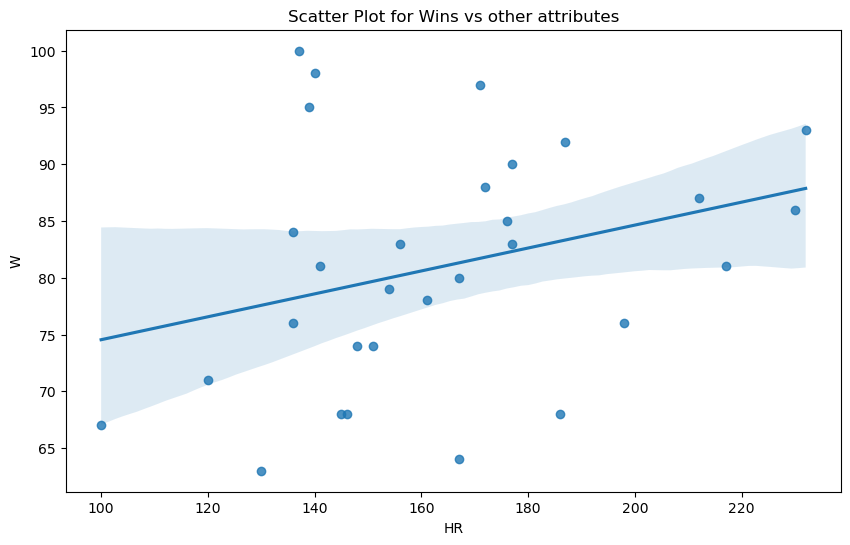

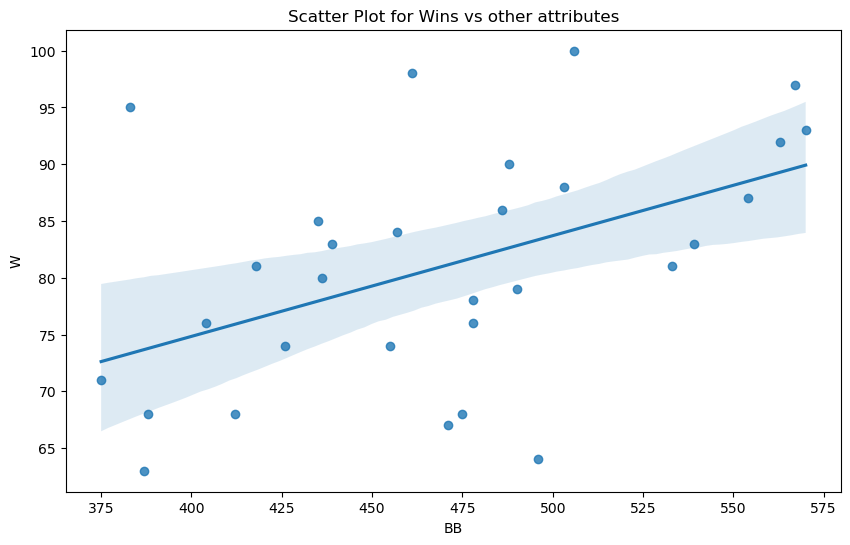

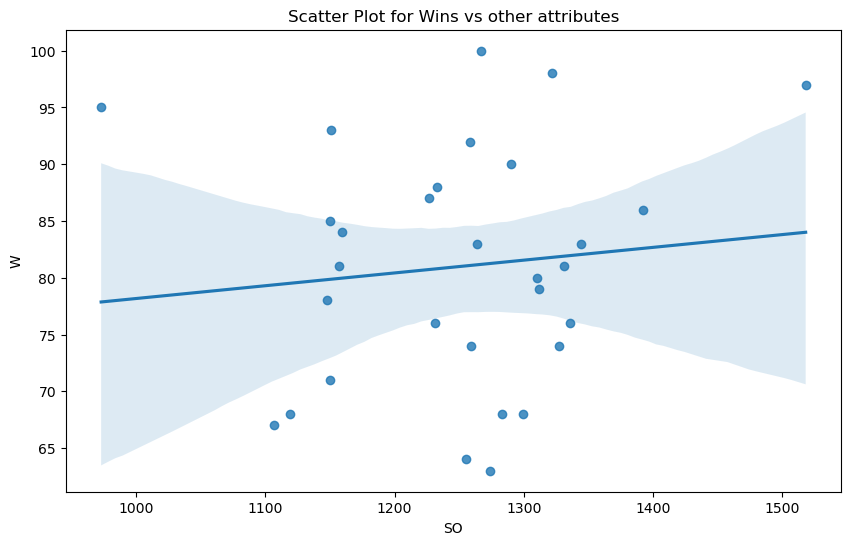

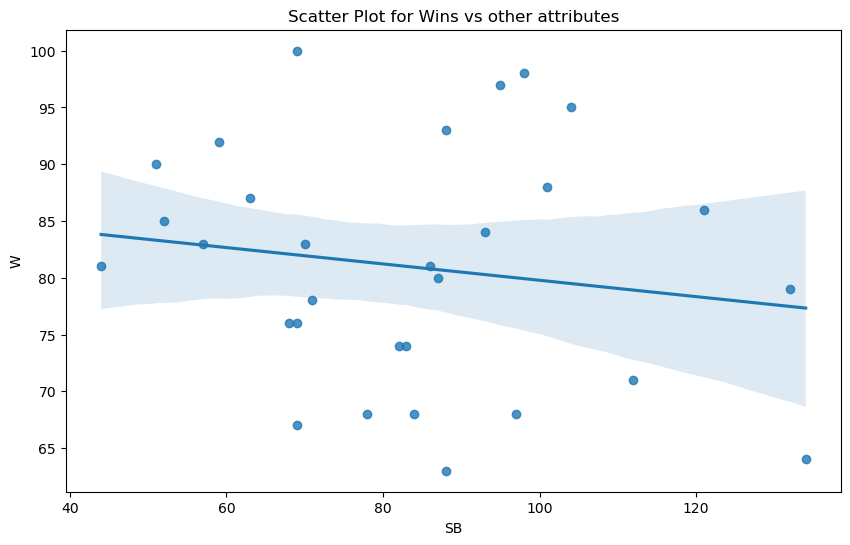

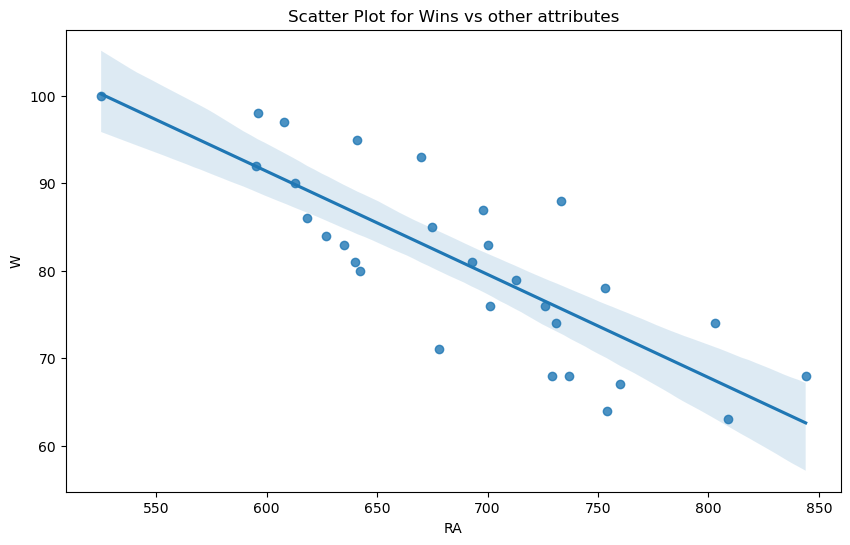

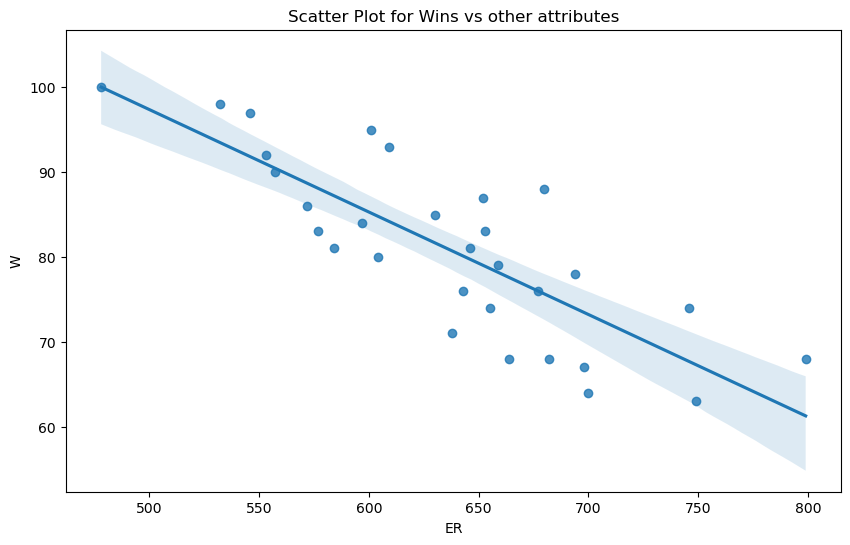

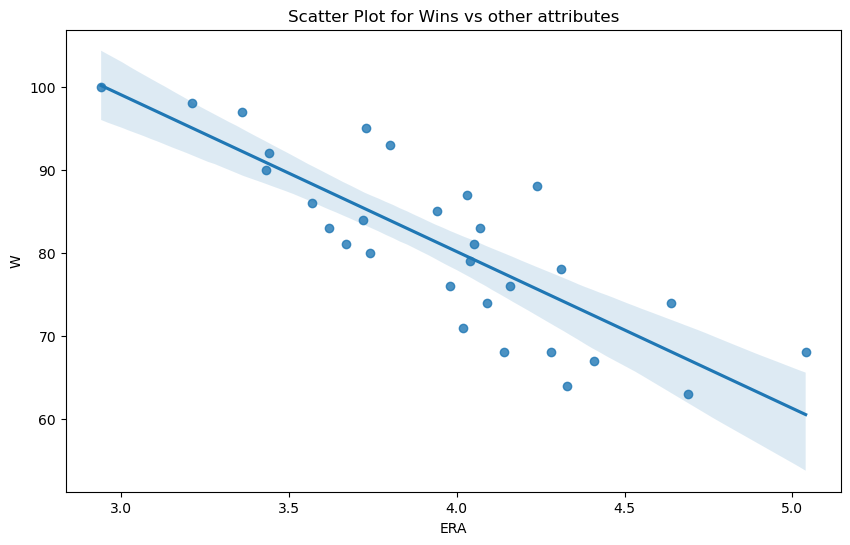

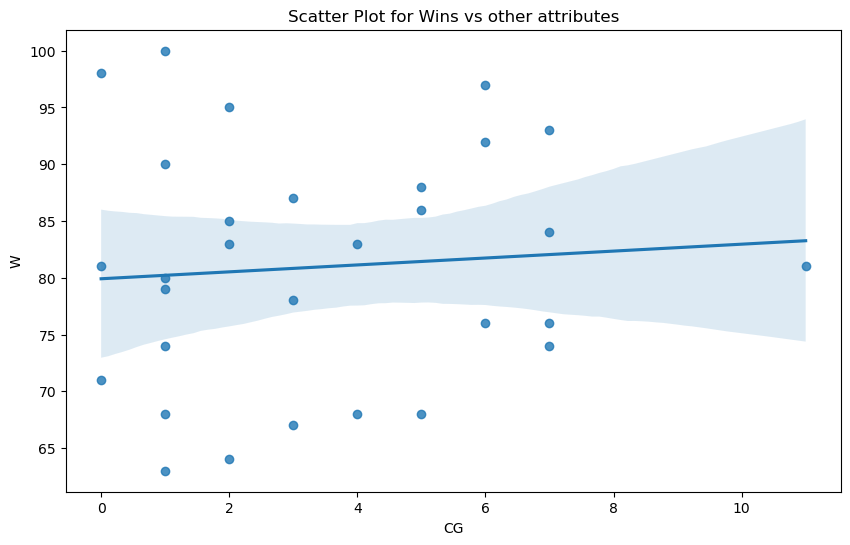

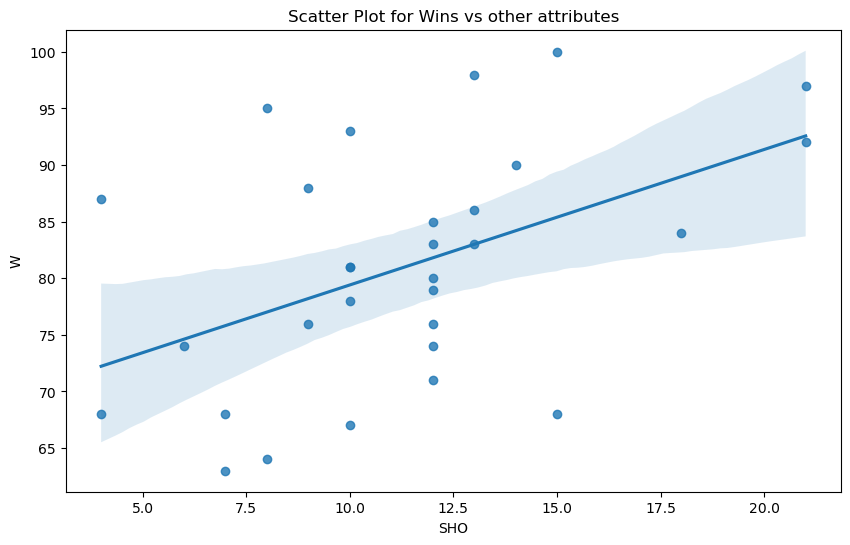

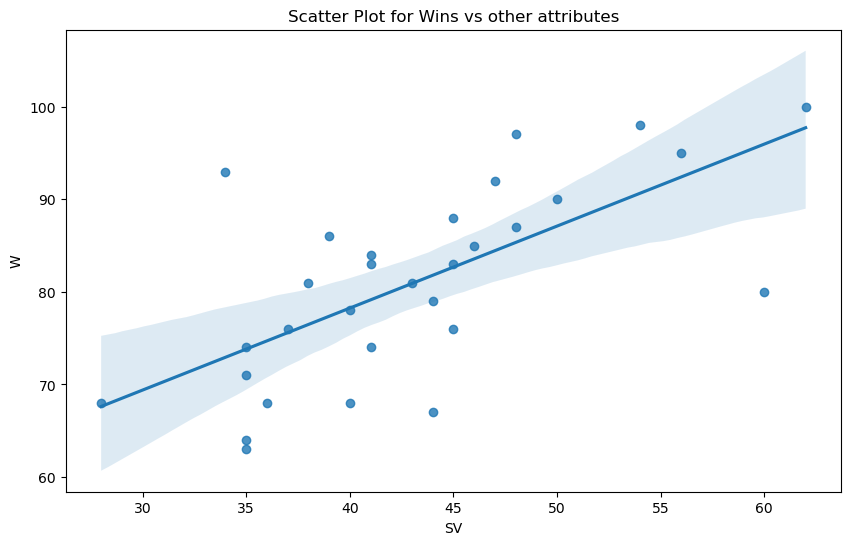

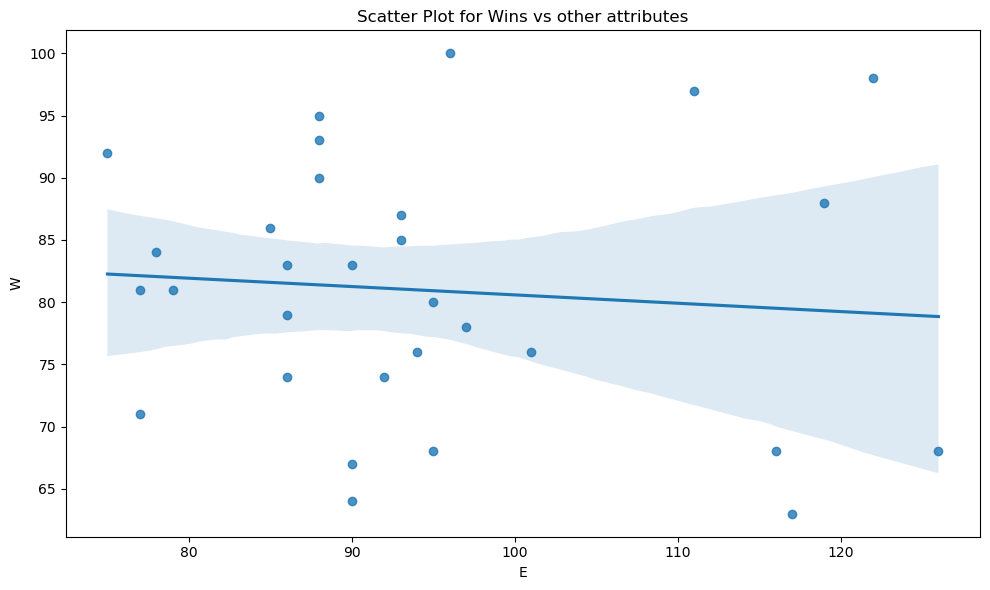

In [26]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

RA, ER, and ERA get along well with Win. Resetting all the columns doesn't have a good relationship with winning because the data is dispersed throughout the system.


# Analysis of Multiple Variables


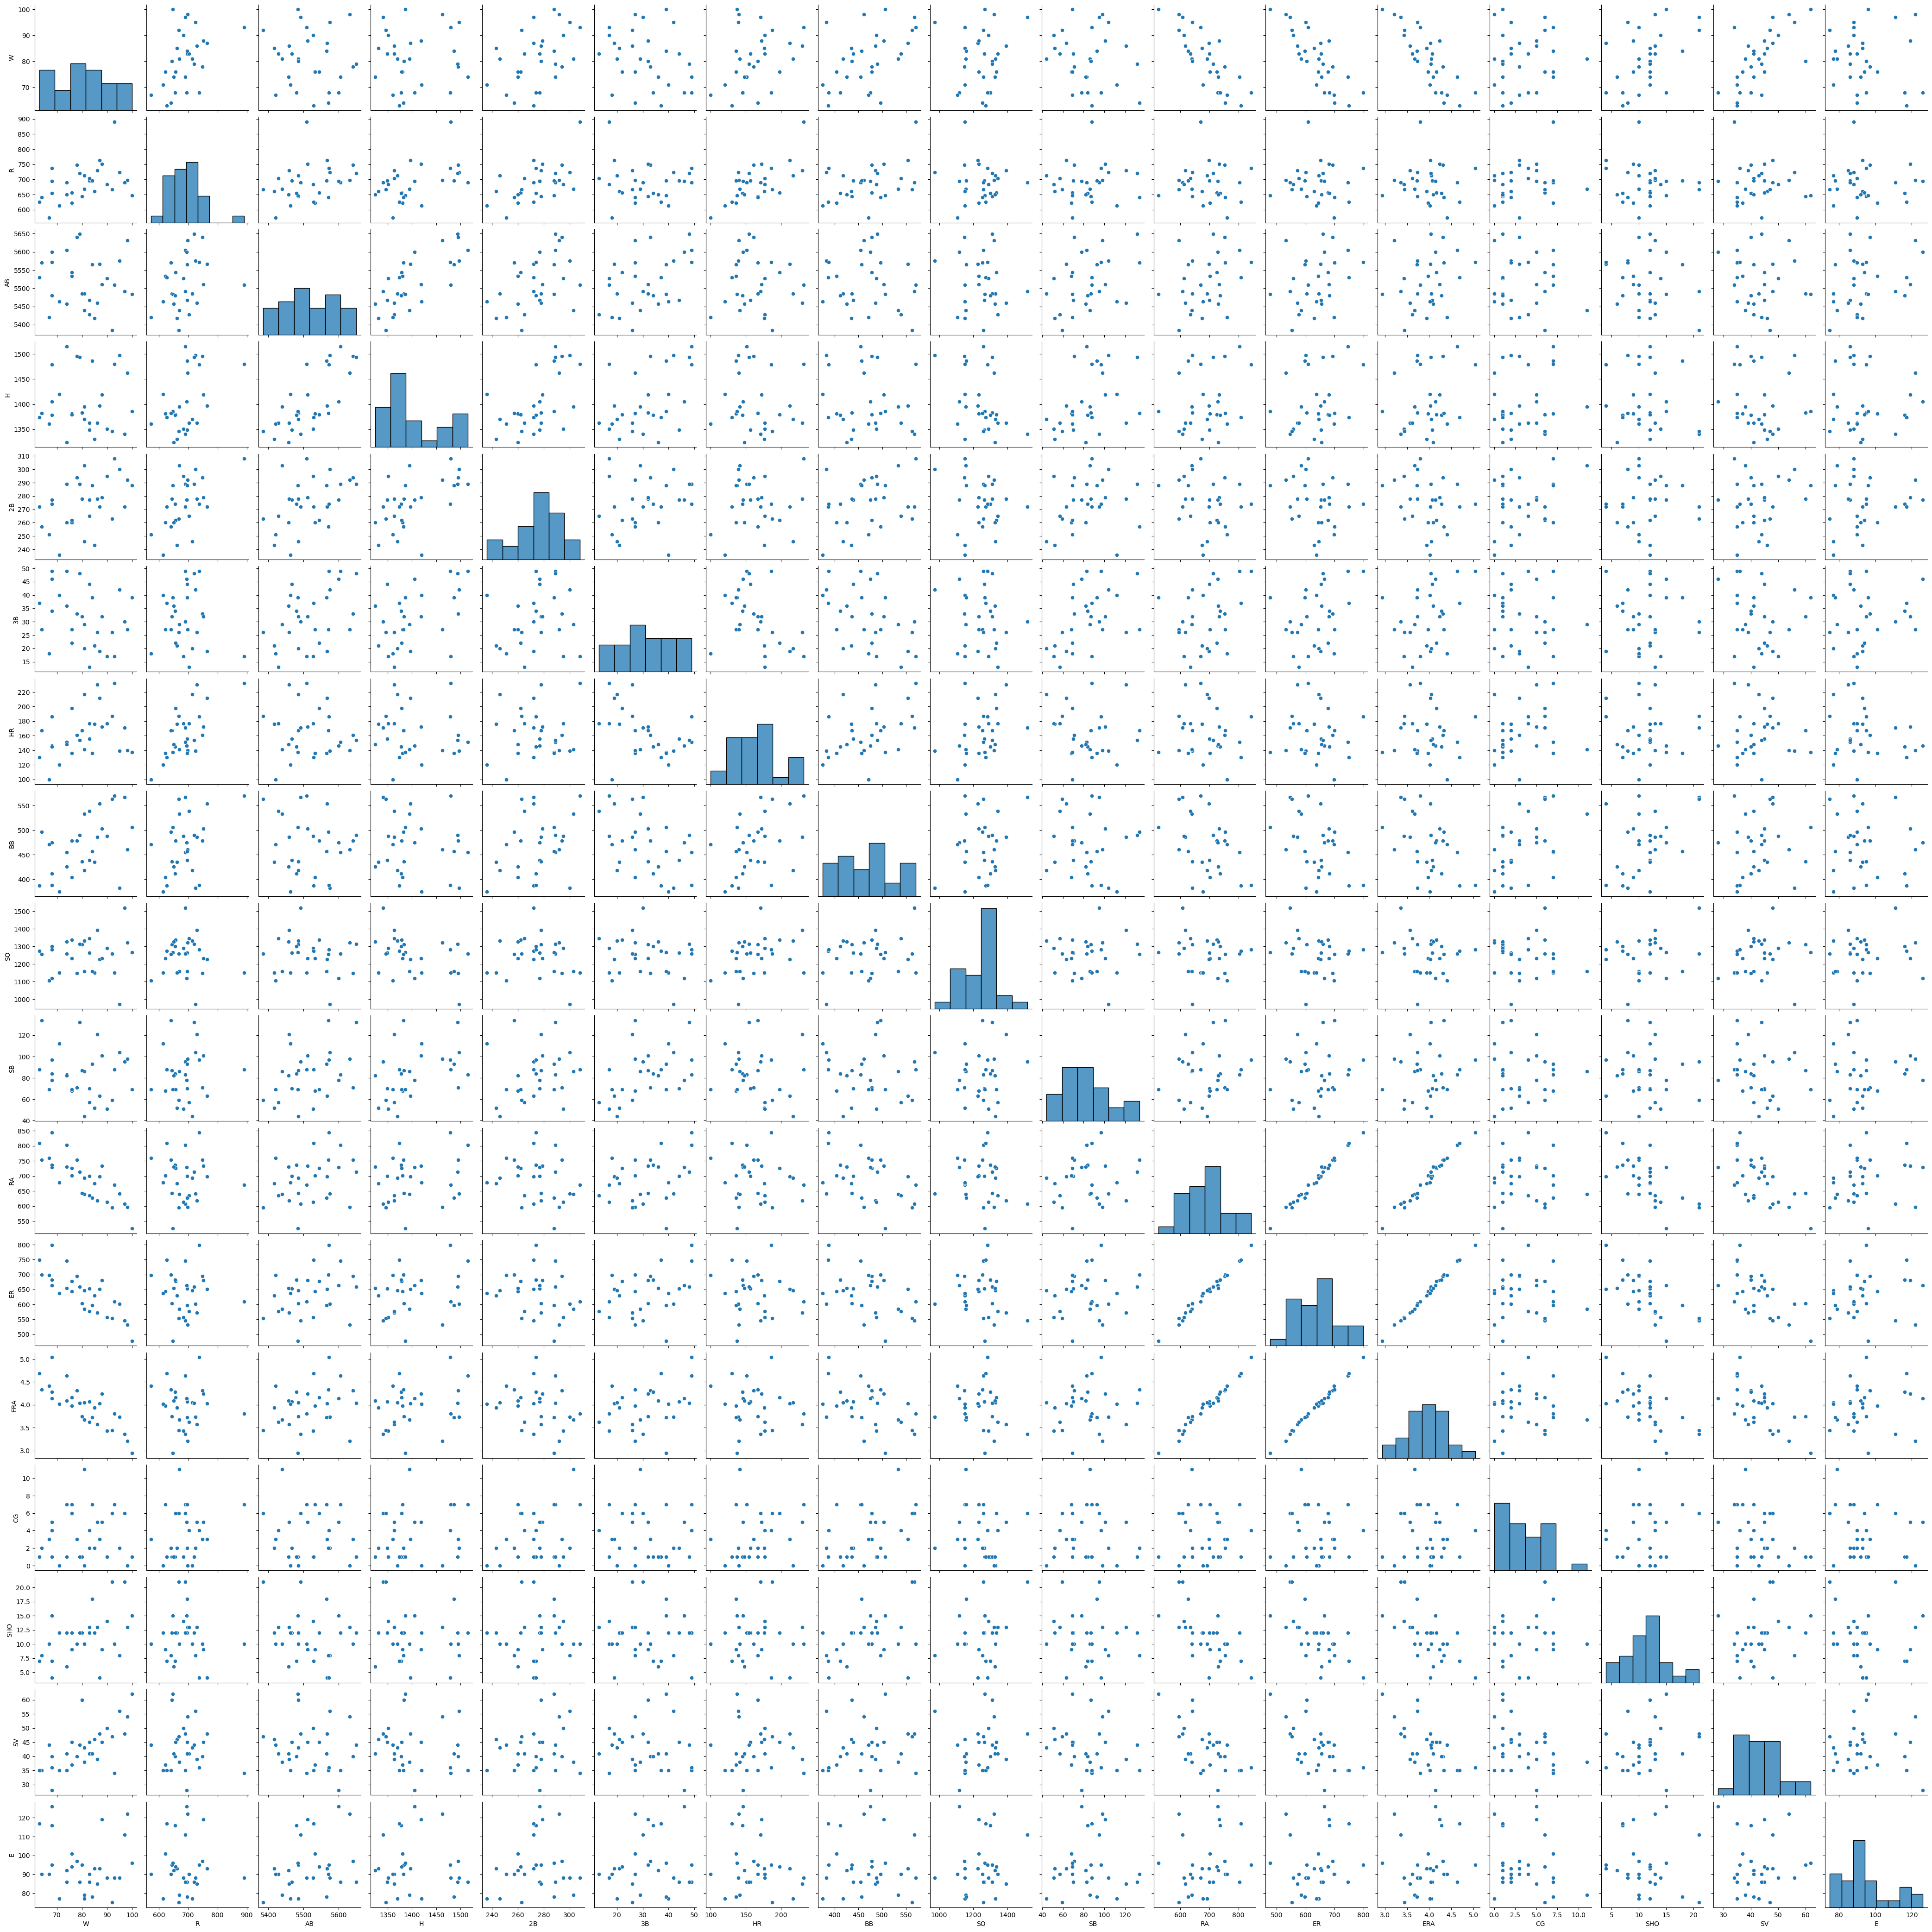

In [27]:
sns.pairplot(df)
plt.show()

Each feature pair's pair plots are located above. I can see if they are making good correlations or if they are randomly distributed with no discernible pattern.


# Heatmap


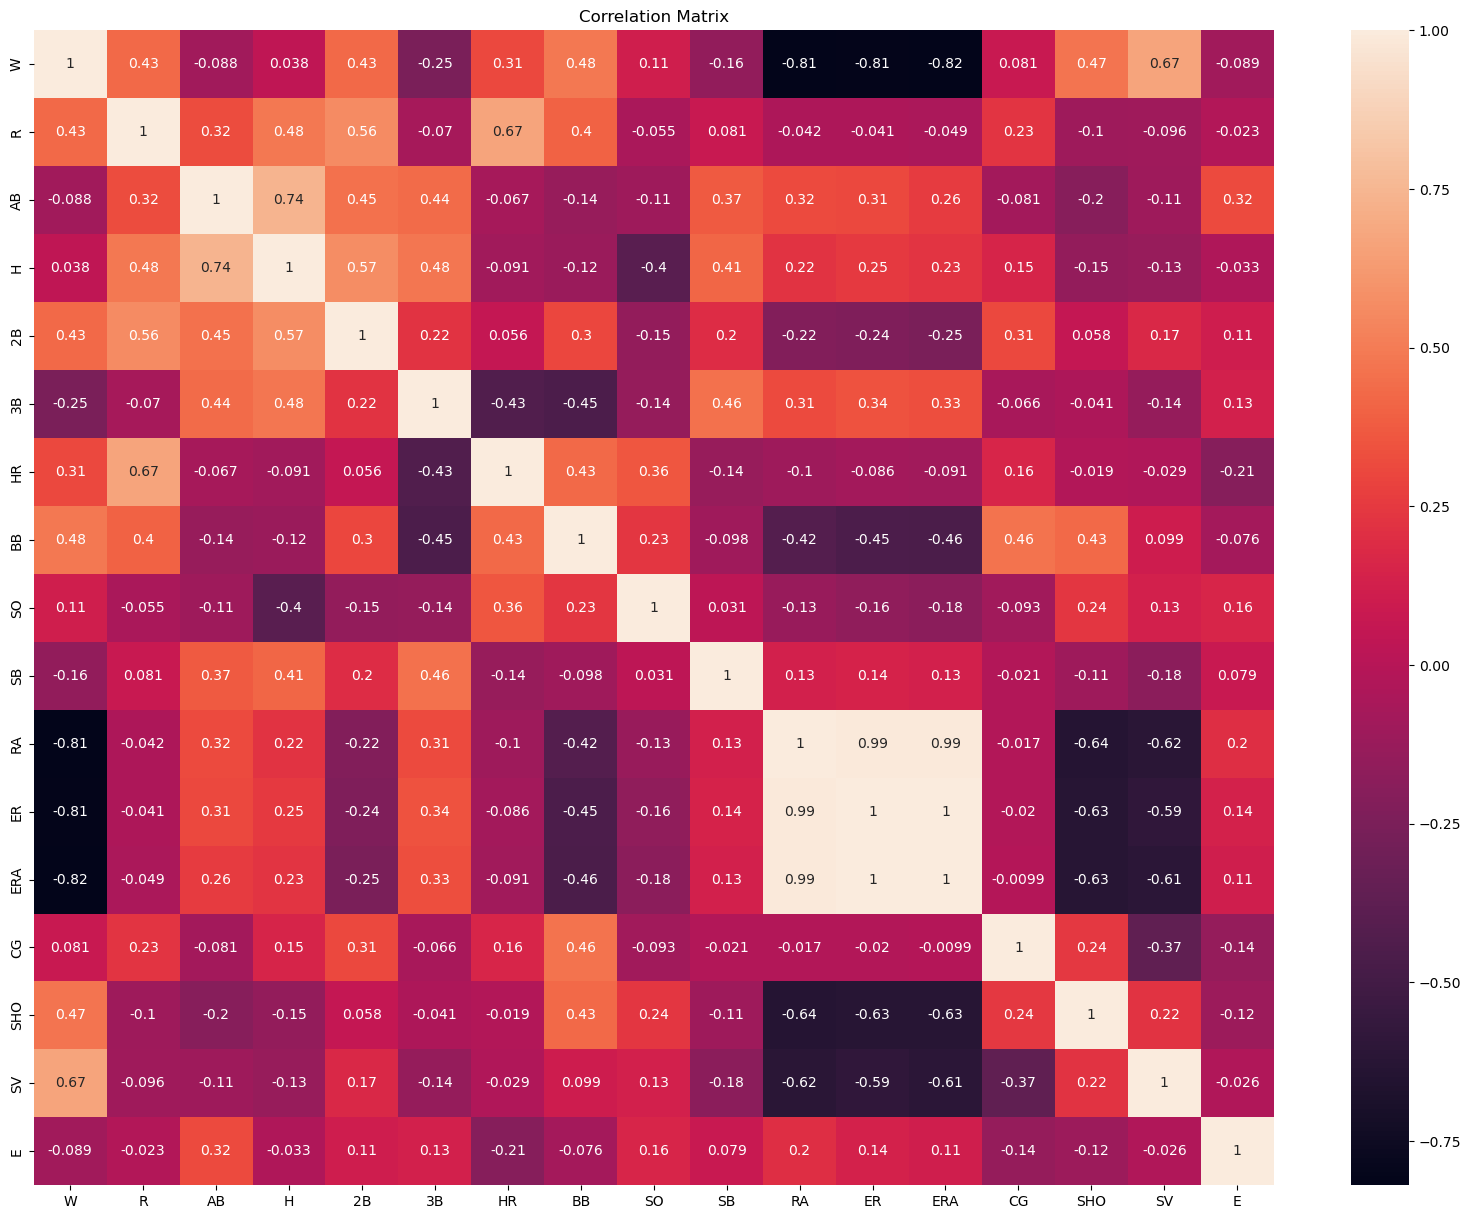

In [28]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

It is displayed in this graph. It has a weak correlation with each other, while the RA, ER, and ERA columns have a strong correlation. Additionally, these columns have a strong negative correlation with the Wins(W) columns, indicating a significant influence on winning. Because these two columns (er, ra) have a similar impact on wins and the prediction model, we are eliminating them while maintaining ERA from them. 


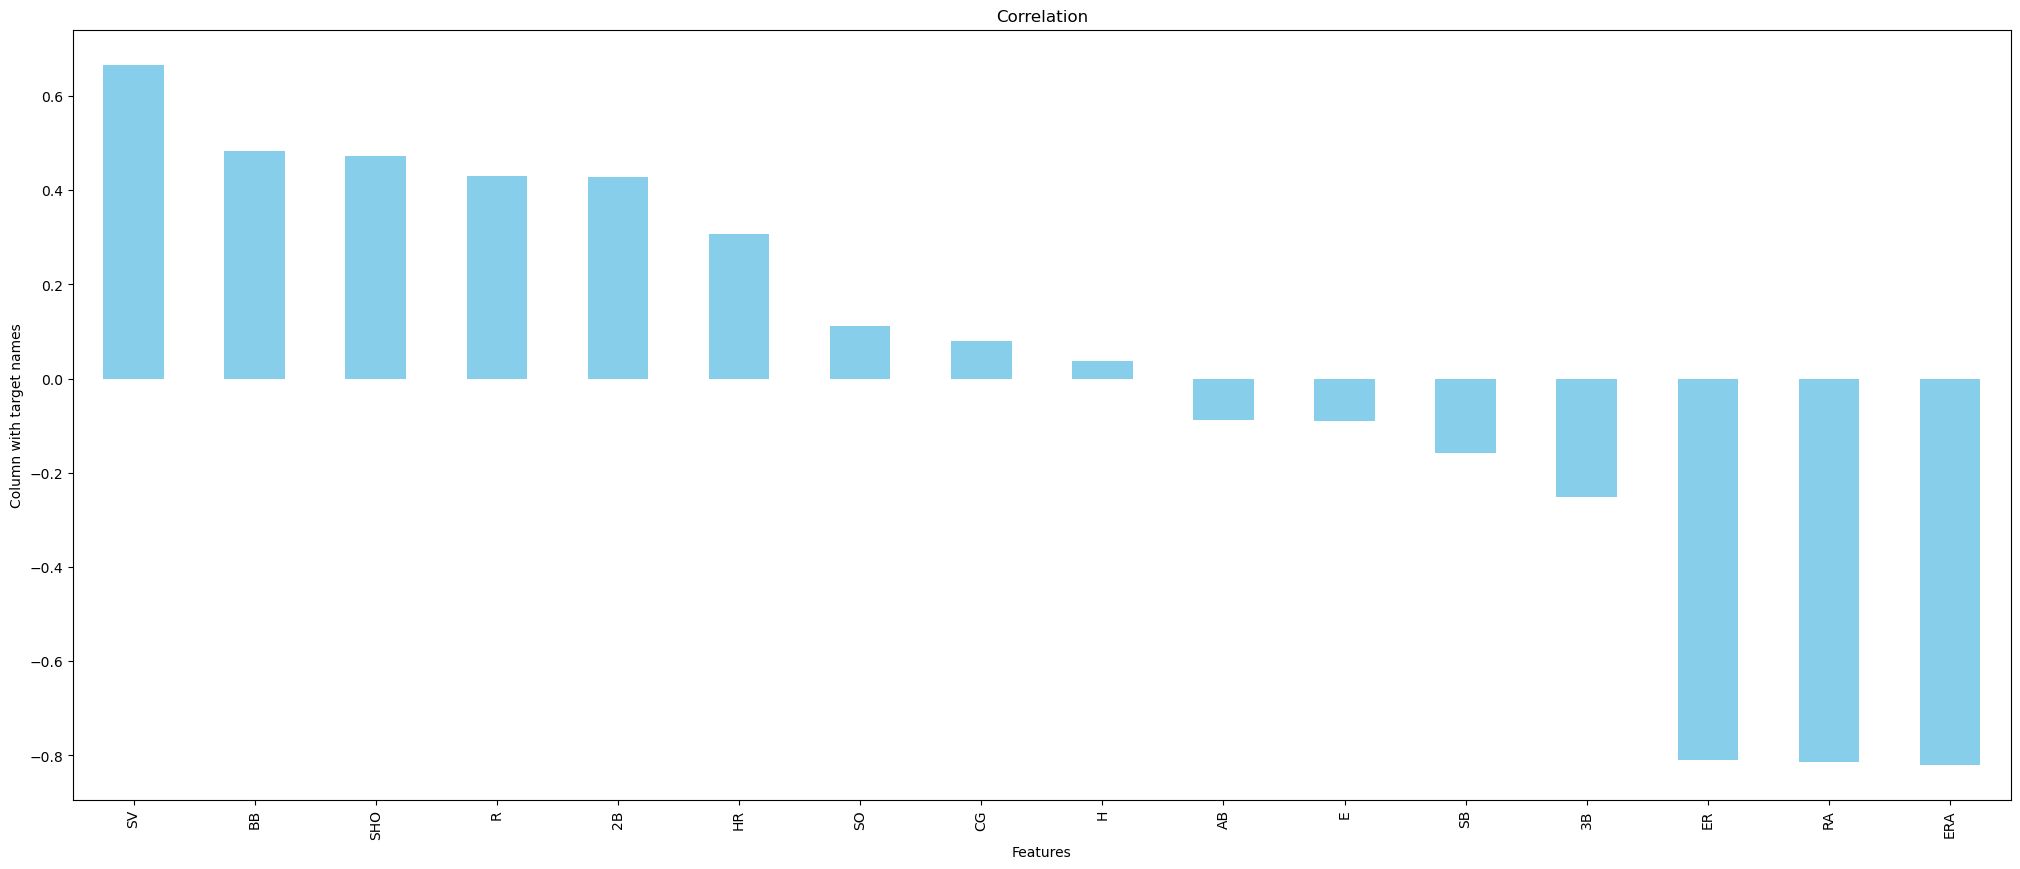

In [29]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

The strongest link between wins and ER, RA, and ERA is negative, as can be seen from the correlation matrix and graph.

On the plus side, BB, SHO, R, and 2B all have correlations above 0.4, with SV having the highest at 0.67.

Although ER, RA, and ERA are all very adversely connected with wins, they have the highest correlation of over 0.99 among one another.


# Data Cleaning

In [30]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

I can see there are no null values.

# Checking for Outliers

<AxesSubplot:>

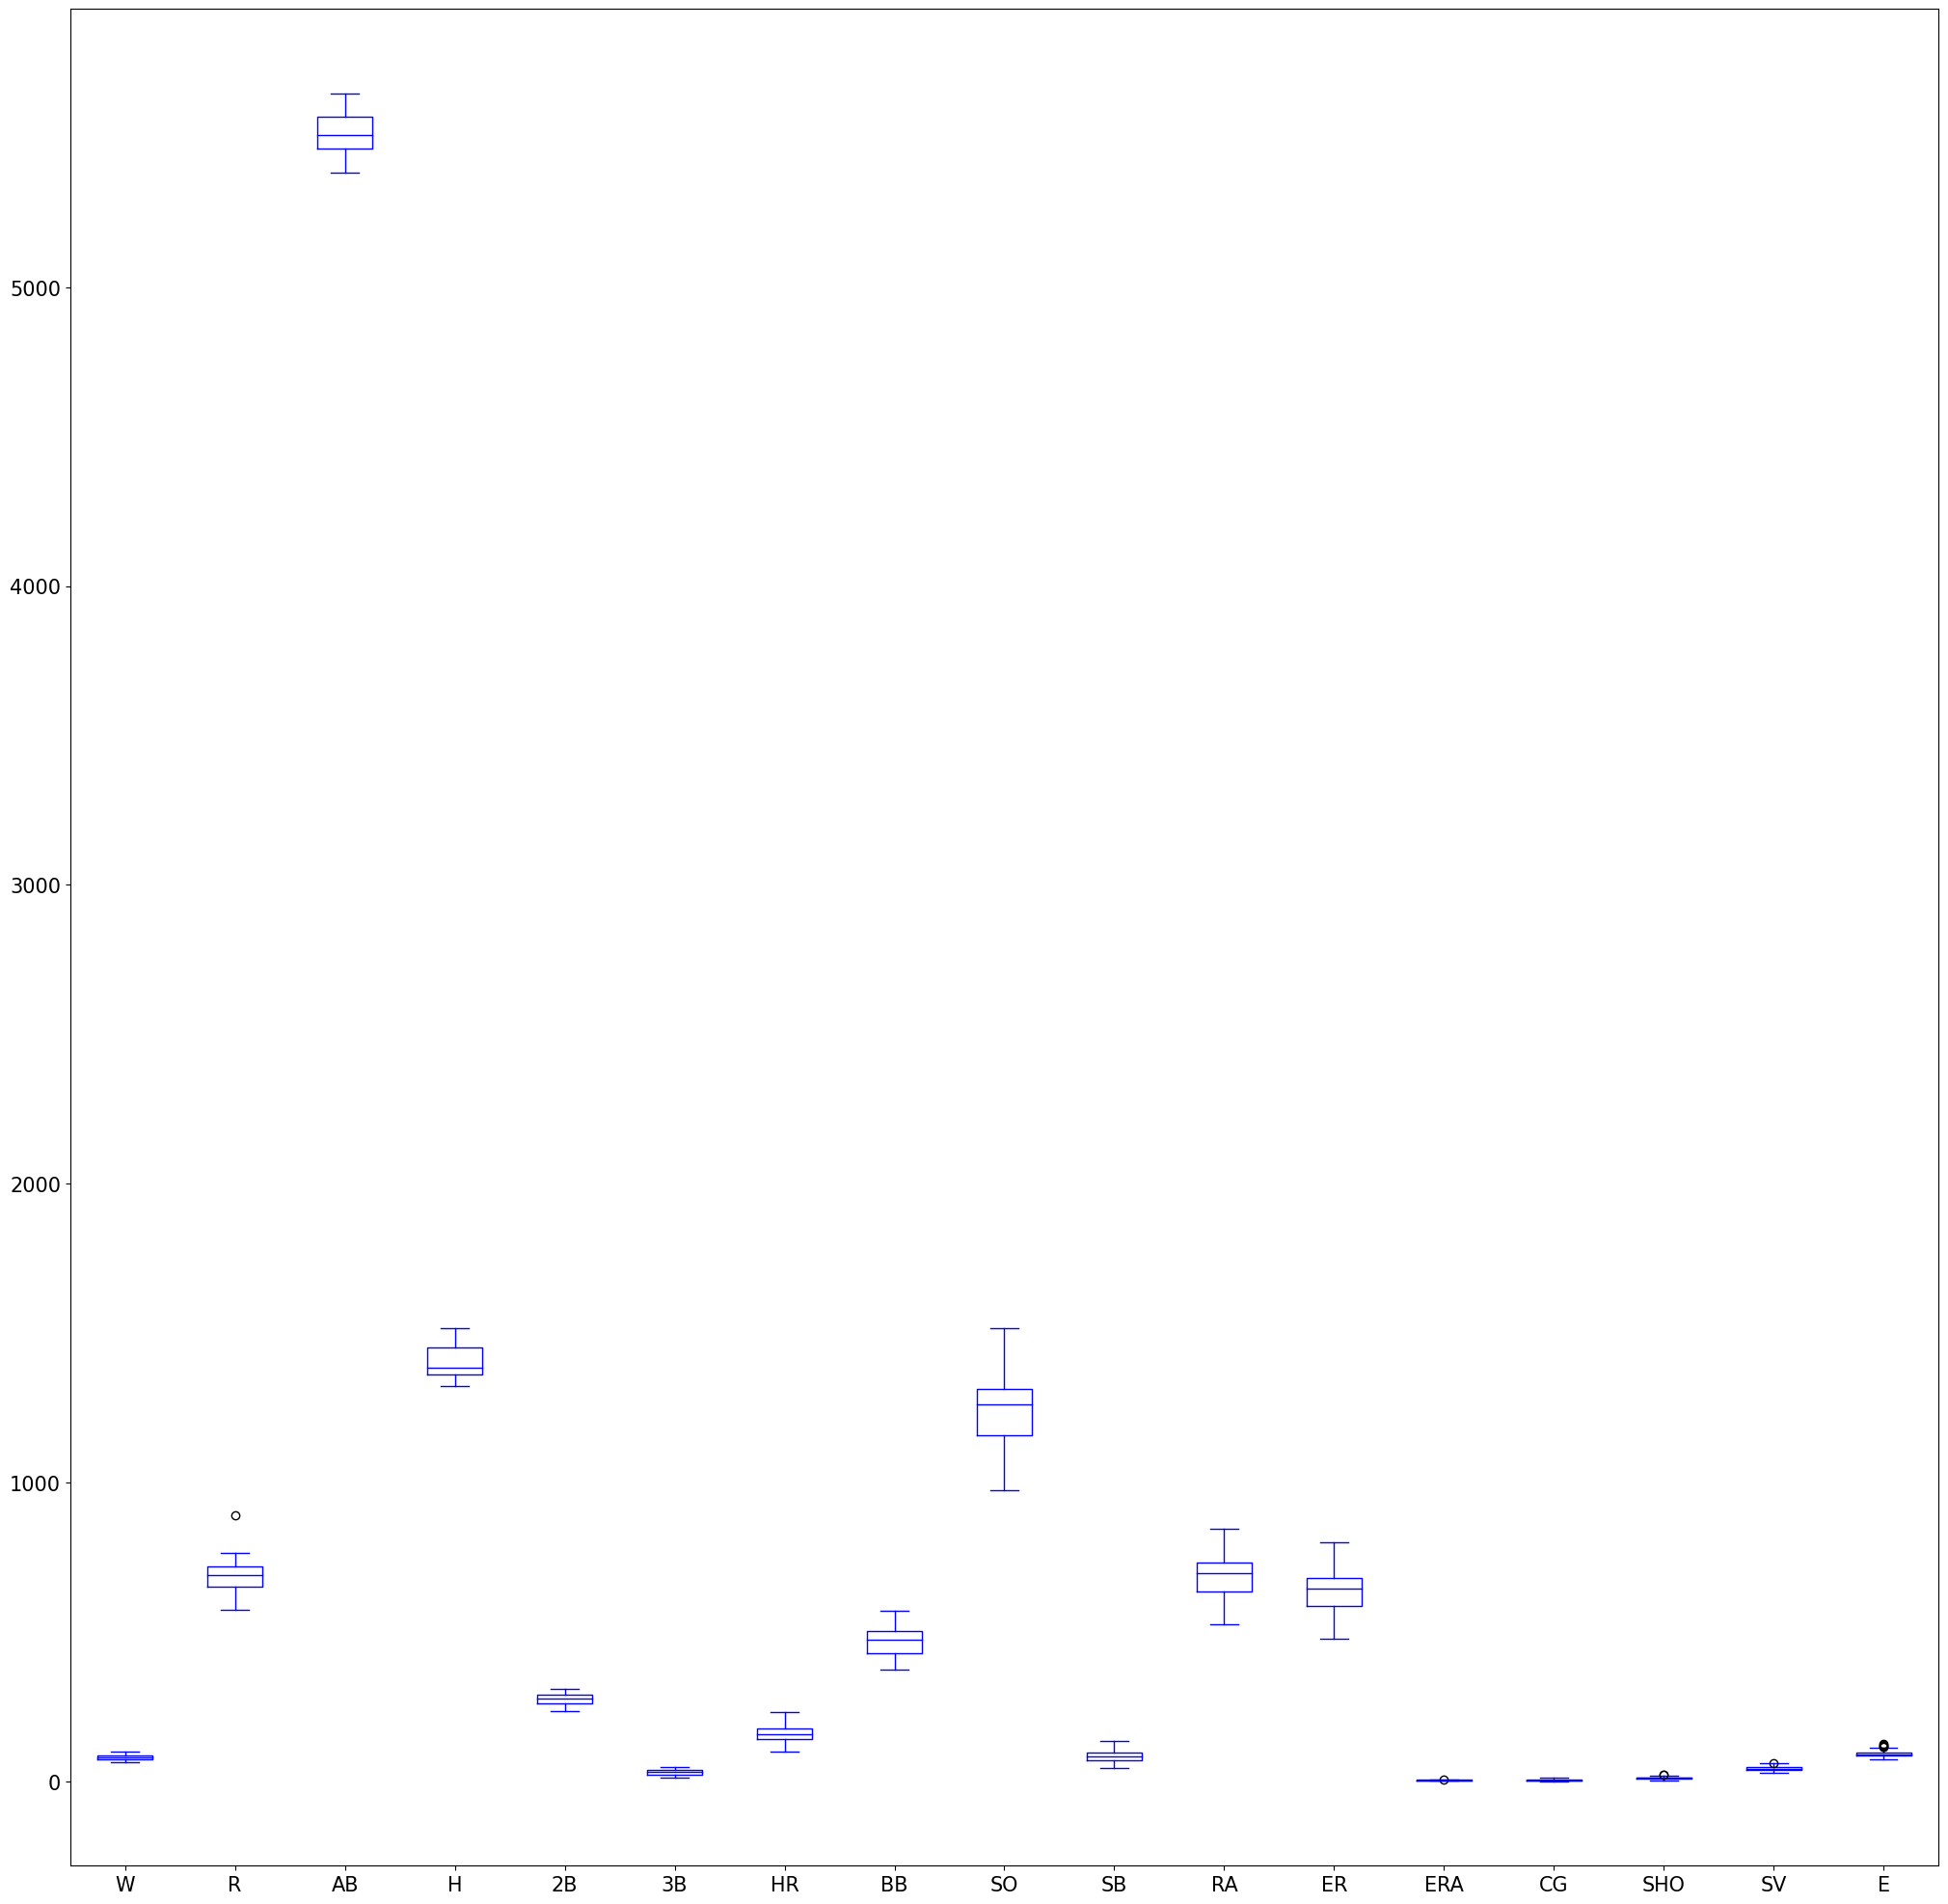

In [31]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='b')

I can infer from the box plot that the R-Runs, ERA-Earned Run Average, SHO-Shutout, SV-Saves, and E-Errors are outliers.


# Removing Outliers


# Zscore method


In [33]:
#Features with outliers
features=df[['R', 'ERA', 'SHO', 'SV', 'E']]


In [34]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


I therefore used Zscore to exclude outliers.


In [35]:
#Shape of new dataset.
df_new.shape


(29, 17)

After outliers are eliminated, the resulting dataset has a form of 29 rows by 17 columns.


In [36]:
#Shape of old dataset
df.shape

(30, 17)

The old dataset has 17 columns and 30 rows.


In [37]:
#dataloss
Dataloss = (((30-29)/30)*100)

In [38]:
Dataloss

3.3333333333333335

Therefore, after deleting outliers of 3.33%, which is less than 10%, I can notice data loss in the zscore technique.


# Examining the Skewness:


In [39]:
#Skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

I can notice skewness in the Hits (H), Completed Games (CG), Shoutouts (SHO), Saves (SV), and Errors (E) categories.


# Sknewness Removal

In [40]:
#Skewed features
skew_feature=["H","CG","SHO","SV","E"]

In [41]:
#Skewness removal using log1p in H
df_new["H"]=np.log1p(df_new["H"])

In [42]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using the Yeo-Johnson technique, I was able to eliminate the skewness in E.


In [43]:
#Using Yeo-Johnson to eliminate skewness
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)


In [44]:
#after reducing skewness, checking for skewness
df_new.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       W    R    AB         H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  \
0    95  724  5575  7.311886  300  42  139  383   973  104  641  601  3.73   
1    83  696  5467  7.207860  277  44  156  439  1264   70  700  653  4.07   
2    81  669  5439  7.241366  303  29  141  533  1157   86  640  584  3.67   
3    76  622  5533  7.231287  260  27  136  404  1231   68  701  643  3.98   
4    74  689  5605  7.323831  289  49  151  455  1259   83  803  746  4.64   
6    87  764  5567  7.242798  272  19  212  554  1227   63  698  652  4.03   
7    81  713  5485  7.223296  246  20  217  418  1331   44  693  646  4.05   
8    80  644  5485  7.232733  278  32  167  436  1310   87  642  604  3.74   
9    78  748  5640  7.310550  294  33  161  478  1148   71  753  694  4.31   
10   88  751  5511  7.258412  279  32  172  503  1233  101  733  680  4.24   
11   86  729  5459  7.218177  278  26  230  486  1392  121  618  572  3.57   
1

I obtained 0.0 skewness after attempting to eliminate skewness in H using the Yeo-Johnson approach.


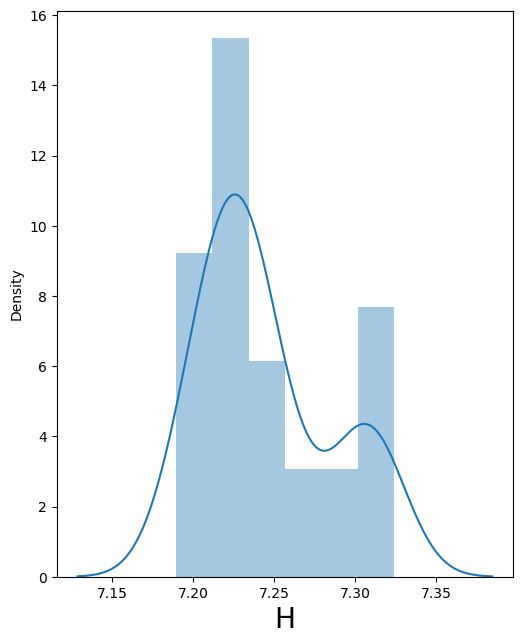

In [59]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

By seeing the plot i can say that skewness is removed.

# Splitting the columns

In [60]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

x=Feature and y=Target

# Using StandardScaler to Scale Data:


In [61]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [62]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [63]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


# Variance inflation coefficient


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


VIF metrics I can confirm that RA, ER, and ERA exhibit multicolinearity. Therefore, I'll remove the RA and ER columns to prevent multicolinearity.


In [65]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [66]:
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,0.770649,-0.513555,0.312020,1.554265


After eliminating multicolinearity, dependent variables are now visible.


In [67]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


Even so, VIF is high for two columns, therefore I'll reduce ERA.


In [70]:
#Droping RA
X = X.drop(["ERA"],axis=1)

In [71]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.019438,R
1,5.210230,AB
2,7.728111,H
3,3.165732,2B
4,2.981242,3B
5,6.168639,HR
6,3.053363,BB
7,2.287734,SO
8,1.773119,SB
9,4.759240,RA


Problem of multicolinearity is resolved.


 # Data division for training and testing


In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Find the best random state possible.

In [73]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768383015216393
At random state0, The test accuracy is :-0.49963681285927775


At random state1, The training accuracy is :-0.9762285427209911
At random state1, The test accuracy is :-0.18565756675520972


At random state2, The training accuracy is :-0.9638255316870868
At random state2, The test accuracy is :--0.2679901647388272


At random state3, The training accuracy is :-0.9677990948927815
At random state3, The test accuracy is :-0.6776697786661834


At random state4, The training accuracy is :-0.9680569379679669
At random state4, The test accuracy is :-0.7641316816583286


At random state5, The training accuracy is :-0.9612472010423034
At random state5, The test accuracy is :-0.6051495407609396


At random state6, The training accuracy is :-0.9723763056746941
At random state6, The test accuracy is :-0.7504731543294726


At random state7, The training accuracy is :-0.9610245315460946
At random state7, The test accuracy is :-0.31669541

I can see that picking random state=99 will result in the highest accuracy.


In [74]:
#dividing the data into 22% of testing and 78% of training

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)


In [75]:
x_train.shape

(22, 16)

In [76]:
y_train.shape

(22,)

In [77]:
x_test.shape

(7, 16)

In [78]:
y_test.shape

(7,)

# Model Building

# Regression Algorithms

In [79]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

1) Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9633011594527375


In [81]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 27.077878720331576
MAE: 4.999072397573668
r2_score: 0.870272379874153


I'm getting an 88% r2_score from LR.


2) SGD:

In [82]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -5.616320192316617e+29
mae: 7.619856456840995e+31
mae: 8725547235904400.0
rmse: 8729178917195474.0


I'm getting a 90% r2_score from SGD.


3)Lasso Regressor

In [83]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [84]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8162585359689928
mse: 24.928841895472164
mae: 4.824282278813735
rmse: 4.992879118852384


I'm getting a 90% r2_score from Lasso.


4)Ridge Regressor

In [85]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [86]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8412293076862607
mse: 21.540970663300794
mae: 4.3822306255797026
rmse: 4.64122512525527


# Verification Across


In [87]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 33.227142, 22.206678
R   : 32.549049, 32.609656
svr   : 54.292689, 31.284378
svr_p   : 111.891643, 79.768934
svr_r   : 112.275451, 79.777668
RF   : 39.864027, 24.023091
DTR   : 70.216667, 45.490539
GBR   : 47.569624, 31.099844


selecting the linearRegression as the final model in accordance with all metrics score


# Hyper Parameter Tuning

In [94]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [95]:
from sklearn.model_selection import ParameterGrid

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.26],
              'selection': ['cyclic', 'random'],
              'max_iter': [2, 4, 6, 8, 10],
              'tol': [100, 1000],
              'fit_intercept': [True, False]}

# Generate all possible combinations of hyperparameters
param_list = list(ParameterGrid(param_grid))
print(f'Total combinations: {len(param_list)}')


Total combinations: 160


In [96]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [97]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [98]:
GVC.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 6,
 'selection': 'random',
 'tol': 1000}

I can see the ideal conditions.


In [99]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 70.18652536124297
mean_squared_error: 40.44897538744015
mean_absolute_error: 5.216336868447049
RMSE value: 6.359950895049439


After adjusting, I achieved a respectable accuracy of 79.48%.


# Model preservation


In [101]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

# Predictions

In [103]:
#Loading the saved model
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([68.3455719 , 68.62522154, 83.91308803, 74.51259088, 87.06771695,
       86.20172151, 91.1032481 ])

Predicted vlues are above listed

In [104]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6
Predicted,68.345572,68.625222,83.913088,74.512591,87.067717,86.201722,91.103248
Original,67.000000,63.000000,97.000000,76.000000,83.000000,92.000000,86.000000


PredictionsThe expected and original values are nearly equal.


# THE BASEBALLCASE STUDY WAS COMPLETED
